# <span style="color:	#0b5394;">Mini-projet N°2 : Machine Learning (ML)</span>

## <span style="color:	#4583bb;">1. Problem Understanding :</span>

The main problem addressed in this project is the automatic detection and classification of network attacks in an IoT environment using network traffic data. The RT-IoT2022 dataset contains several features extracted from network traffic, along with a target variable that represents the type of attack or normal traffic. The objective is to build a classification model capable of analyzing these features and accurately predicting the corresponding attack class.

Machine Learning plays an essential role in solving this problem because it allows the analysis of large and complex datasets and the identification of hidden patterns that are difficult to detect using traditional rule-based methods. By applying supervised learning algorithms, the model can learn from labeled data and generalize to new, unseen network traffic. As a result, Machine Learning-based approaches improve the accuracy, efficiency, and automation of intrusion detection systems in IoT networks.

## <span style="color:	#4583bb;">2. EDA :</span>

### <span style="color:	#6fa8dc;">Importing Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### <span style="color:	#6fa8dc;">Loading the Data</span>

In [2]:
data = pd.read_csv('RT_IOT2022.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.shape

(123117, 85)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [6]:
df.head()

Unnamed: 0  id.orig_p  id.resp_p proto service  flow_duration  \
0           0      38667       1883   tcp    mqtt      32.011598   
1           1      51143       1883   tcp    mqtt      31.883584   
2           2      44761       1883   tcp    mqtt      32.124053   
3           3      60893       1883   tcp    mqtt      31.961063   
4           4      51087       1883   tcp    mqtt      31.902362   

   fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0             9             5                  3                  3  ...   
1             9             5                  3                  3  ...   
2             9             5                  3                  3  ...   
3             9             5                  3                  3  ...   
4             9             5                  3                  3  ...   

   active.std      idle.min      idle.max      idle.tot      idle.avg  \
0         0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07   
1         0.0  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07   
2         0.0  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07   
3         0.0  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07   
4         0.0  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07   

   idle.std  fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0       0.0                 64240                 26847                   502   
1       0.0                 64240                 26847                   502   
2       0.0                 64240                 26847                   502   
3       0.0                 64240                 26847                   502   
4       0.0                 64240                 26847                   502   

    Attack_type  
0  MQTT_Publish  
1  MQTT_Publish  
2  MQTT_Publish  
3  MQTT_Publish  
4  MQTT_Publish  

[5 rows x 85 columns]

In [7]:
df.tail()

Unnamed: 0  id.orig_p  id.resp_p proto service  flow_duration  \
123112        2005      59247      63331   tcp       -       0.000006   
123113        2006      59247      64623   tcp       -       0.000007   
123114        2007      59247      64680   tcp       -       0.000006   
123115        2008      59247      65000   tcp       -       0.000006   
123116        2009      59247      65129   tcp       -       0.000006   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
123112             1             1                  0                  0  ...   
123113             1             1                  0                  0  ...   
123114             1             1                  0                  0  ...   
123115             1             1                  0                  0  ...   
123116             1             1                  0                  0  ...   

        active.std  idle.min  idle.max  idle.tot  idle.avg  idle.std  \
123112         0.0       0.0       0.0       0.0       0.0       0.0   
123113         0.0       0.0       0.0       0.0       0.0       0.0   
123114         0.0       0.0       0.0       0.0       0.0       0.0   
123115         0.0       0.0       0.0       0.0       0.0       0.0   
123116         0.0       0.0       0.0       0.0       0.0       0.0   

        fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
123112                  1024                     0                  1024   
123113                  1024                     0                  1024   
123114                  1024                     0                  1024   
123115                  1024                     0                  1024   
123116                  1024                     0                  1024   

                Attack_type  
123112  NMAP_XMAS_TREE_SCAN  
123113  NMAP_XMAS_TREE_SCAN  
123114  NMAP_XMAS_TREE_SCAN  
123115  NMAP_XMAS_TREE_SCAN  
123116  NMAP_XMAS_TREE_SCAN  

[5 rows x 85 columns]

In [8]:
df.describe()

Unnamed: 0      id.orig_p      id.resp_p  flow_duration  \
count  123117.000000  123117.000000  123117.000000  123117.000000   
mean    37035.089248   34639.258738    1014.305092       3.809566   
std     30459.106367   19070.620354    5256.371994     130.005408   
min         0.000000       0.000000       0.000000       0.000000   
25%      6059.000000   17702.000000      21.000000       0.000001   
50%     33100.000000   37221.000000      21.000000       0.000004   
75%     63879.000000   50971.000000      21.000000       0.000005   
max     94658.000000   65535.000000   65389.000000   21728.335578   

        fwd_pkts_tot   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
count  123117.000000  123117.000000      123117.000000      123117.000000   
mean        2.268826       1.909509           1.471218           0.820260   
std        22.336565      33.018311          19.635196          32.293948   
min         0.000000       0.000000           0.000000           0.000000   
25%         1.000000       1.000000           1.000000           0.000000   
50%         1.000000       1.000000           1.000000           0.000000   
75%         1.000000       1.000000           1.000000           0.000000   
max      4345.000000   10112.000000        4345.000000       10105.000000   

       fwd_pkts_per_sec  bwd_pkts_per_sec  ...    active.avg    active.std  \
count      1.231170e+05      1.231170e+05  ...  1.231170e+05  1.231170e+05   
mean       3.518063e+05      3.517620e+05  ...  1.481354e+05  2.353599e+04   
std        3.707645e+05      3.708015e+05  ...  1.613007e+06  1.477935e+06   
min        0.000000e+00      0.000000e+00  ...  0.000000e+00  0.000000e+00   
25%        7.454354e+01      7.288927e+01  ...  9.536740e-01  0.000000e+00   
50%        2.467238e+05      2.467238e+05  ...  4.053116e+00  0.000000e+00   
75%        5.242880e+05      5.242880e+05  ...  5.006790e+00  0.000000e+00   
max        1.048576e+06      1.048576e+06  ...  4.374931e+08  4.774862e+08   

           idle.min      idle.max      idle.tot      idle.avg      idle.std  \
count  1.231170e+05  1.231170e+05  1.231170e+05  1.231170e+05  1.231170e+05   
mean   1.616655e+06  1.701956e+06  3.517644e+06  1.664985e+06  4.550183e+04   
std    8.809396e+06  9.252337e+06  1.229508e+08  9.007064e+06  1.091361e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.000000e+08  3.000000e+08  2.096777e+10  3.000000e+08  1.208029e+08   

       fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  
count         123117.000000         123117.000000         123117.000000  
mean            6118.905123           2739.776018            751.647514  
std            18716.313861          10018.848534           6310.183843  
min                0.000000              0.000000              0.000000  
25%               64.000000              0.000000             64.000000  
50%               64.000000              0.000000             64.000000  
75%               64.000000              0.000000             64.000000  
max            65535.000000          65535.000000          65535.000000  

[8 rows x 82 columns]

In [9]:
df.describe(include = 'all').T

count unique            top    freq          mean  \
Unnamed: 0            123117.0    NaN            NaN     NaN  37035.089248   
id.orig_p             123117.0    NaN            NaN     NaN  34639.258738   
id.resp_p             123117.0    NaN            NaN     NaN   1014.305092   
proto                   123117      3            tcp  110427           NaN   
service                 123117     10              -  102861           NaN   
...                        ...    ...            ...     ...           ...   
idle.std              123117.0    NaN            NaN     NaN  45501.831692   
fwd_init_window_size  123117.0    NaN            NaN     NaN   6118.905123   
bwd_init_window_size  123117.0    NaN            NaN     NaN   2739.776018   
fwd_last_window_size  123117.0    NaN            NaN     NaN    751.647514   
Attack_type             123117     12  DOS_SYN_Hping   94659           NaN   

                                std  min      25%      50%      75%  \
Unnamed: 0             30459.106367  0.0   6059.0  33100.0  63879.0   
id.orig_p              19070.620354  0.0  17702.0  37221.0  50971.0   
id.resp_p               5256.371994  0.0     21.0     21.0     21.0   
proto                           NaN  NaN      NaN      NaN      NaN   
service                         NaN  NaN      NaN      NaN      NaN   
...                             ...  ...      ...      ...      ...   
idle.std              1091361.40171  0.0      0.0      0.0      0.0   
fwd_init_window_size   18716.313861  0.0     64.0     64.0     64.0   
bwd_init_window_size   10018.848534  0.0      0.0      0.0      0.0   
fwd_last_window_size    6310.183843  0.0     64.0     64.0     64.0   
Attack_type                     NaN  NaN      NaN      NaN      NaN   

                                   max  
Unnamed: 0                     94658.0  
id.orig_p                      65535.0  
id.resp_p                      65389.0  
proto                              NaN  
service                            NaN  
...                                ...  
idle.std              120802870.628073  
fwd_init_window_size           65535.0  
bwd_init_window_size           65535.0  
fwd_last_window_size           65535.0  
Attack_type                        NaN  

[85 rows x 11 columns]

##### <span style="color:#7fbce9;">Checking for duplicates</span>

In [10]:
df.duplicated().sum()

np.int64(0)

No duplicates

##### <span style="color:#7fbce9;">Checking for missing values</span>

In [11]:
df.isna().sum()

Unnamed: 0              0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

No missing values

##### <span style="color:#7fbce9;">Checking for null values</span>

In [12]:
df.isnull().sum()

Unnamed: 0              0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

No null values

In [13]:
df.dtypes

Unnamed: 0                int64
id.orig_p                 int64
id.resp_p                 int64
proto                    object
service                  object
                         ...   
idle.std                float64
fwd_init_window_size      int64
bwd_init_window_size      int64
fwd_last_window_size      int64
Attack_type              object
Length: 85, dtype: object

In [14]:
df.columns

Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service',
       'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.

##### <span style="color:#7fbce9;">Unsignificant columns</span>

In [15]:
df['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
          ... 
123112    2005
123113    2006
123114    2007
123115    2008
123116    2009
Name: Unnamed: 0, Length: 123117, dtype: int64

We see that the column 'Unnamed: 0' has no signification, so it better be dropped

In [16]:
df = df.drop('Unnamed: 0', axis=1)

In [17]:
df.head()

id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0      38667       1883   tcp    mqtt      32.011598             9   
1      51143       1883   tcp    mqtt      31.883584             9   
2      44761       1883   tcp    mqtt      32.124053             9   
3      60893       1883   tcp    mqtt      31.961063             9   
4      51087       1883   tcp    mqtt      31.902362             9   

   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  ...  \
0             5                  3                  3          0.281148  ...   
1             5                  3                  3          0.282277  ...   
2             5                  3                  3          0.280164  ...   
3             5                  3                  3          0.281593  ...   
4             5                  3                  3          0.282111  ...   

   active.std      idle.min      idle.max      idle.tot      idle.avg  \
0         0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07   
1         0.0  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07   
2         0.0  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07   
3         0.0  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07   
4         0.0  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07   

   idle.std  fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0       0.0                 64240                 26847                   502   
1       0.0                 64240                 26847                   502   
2       0.0                 64240                 26847                   502   
3       0.0                 64240                 26847                   502   
4       0.0                 64240                 26847                   502   

    Attack_type  
0  MQTT_Publish  
1  MQTT_Publish  
2  MQTT_Publish  
3  MQTT_Publish  
4  MQTT_Publish  

[5 rows x 84 columns]

##### <span style="color:#7fbce9;">Unique values</span>

In [18]:
df.nunique().sort_values()

bwd_URG_flag_count              1
fwd_URG_flag_count              2
proto                           3
flow_ECE_flag_count             5
flow_CWR_flag_count             5
                            ...  
flow_iat.tot                16784
flow_iat.avg                16912
flow_iat.std                17180
payload_bytes_per_second    17238
id.orig_p                   65478
Length: 84, dtype: int64

We see that the value of bwd_URG_flag_count is the same, so we should remove it since it's constant 

In [19]:
df = df.drop('bwd_URG_flag_count', axis=1)

In [20]:
df.head()

id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0      38667       1883   tcp    mqtt      32.011598             9   
1      51143       1883   tcp    mqtt      31.883584             9   
2      44761       1883   tcp    mqtt      32.124053             9   
3      60893       1883   tcp    mqtt      31.961063             9   
4      51087       1883   tcp    mqtt      31.902362             9   

   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  ...  \
0             5                  3                  3          0.281148  ...   
1             5                  3                  3          0.282277  ...   
2             5                  3                  3          0.280164  ...   
3             5                  3                  3          0.281593  ...   
4             5                  3                  3          0.282111  ...   

   active.std      idle.min      idle.max      idle.tot      idle.avg  \
0         0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07   
1         0.0  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07   
2         0.0  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07   
3         0.0  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07   
4         0.0  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07   

   idle.std  fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0       0.0                 64240                 26847                   502   
1       0.0                 64240                 26847                   502   
2       0.0                 64240                 26847                   502   
3       0.0                 64240                 26847                   502   
4       0.0                 64240                 26847                   502   

    Attack_type  
0  MQTT_Publish  
1  MQTT_Publish  
2  MQTT_Publish  
3  MQTT_Publish  
4  MQTT_Publish  

[5 rows x 83 columns]

##### <span style="color:#7fbce9;">Numeric columns</span>

In [21]:
num_cols=df.select_dtypes(include=[np.number])
num_cols.columns

Index(['id.orig_p', 'id.resp_p', 'flow_duration', 'fwd_pkts_tot',
       'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot',
       'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec',
       'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min',
       'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min',
       'bwd_header_size_max', 'flow_FIN_flag_count', 'flow_SYN_flag_count',
       'flow_RST_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count',
       'flow_ACK_flag_count', 'fwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
       'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       'flow_pkts_payload.avg', 'flow_pkts_payload.std', 

##### <span style="color:#7fbce9;">Categorical columns</span>

In [22]:
ctg_cols=data.select_dtypes(include=['object']).columns
ctg_cols

Index(['proto', 'service', 'Attack_type'], dtype='object')

### <span style="color:	#6fa8dc;">Inspecting the target: Attack_type</span>

In [23]:
attack_count=df['Attack_type'].value_counts()
attack_count

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

Distribution of the target showing an imbalance

##### <span style="color:#7fbce9;">Normal Patterns in attaque type column</span>

In [24]:
df["Attack_type"] = df["Attack_type"].replace(
    {"MQTT_Publish": "NORMAL", "Thing_Speak": "NORMAL", "Wipro_bulb": "NORMAL"}
)

In [25]:
df['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping                 94659
NORMAL                        12507
ARP_poisioning                 7750
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

##### <span style="color:#7fbce9;">Inspecting other categorical values</span>

In [26]:
df['proto'].value_counts()

proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64

In [27]:
df['service'].value_counts()

service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64

We see that there is a value that is -, we should replace it by 'unknown'

In [28]:
df['service'].replace('-','unknown', inplace=True)

In [29]:
df['service'].value_counts()

service
unknown    102861
dns          9753
mqtt         4132
http         3464
ssl          2663
ntp           121
dhcp           50
irc            43
ssh            28
radius          2
Name: count, dtype: int64

##### <span style="color:#7fbce9;">Plot categorical values of (Protocol, Service and Attack_Type)</span>

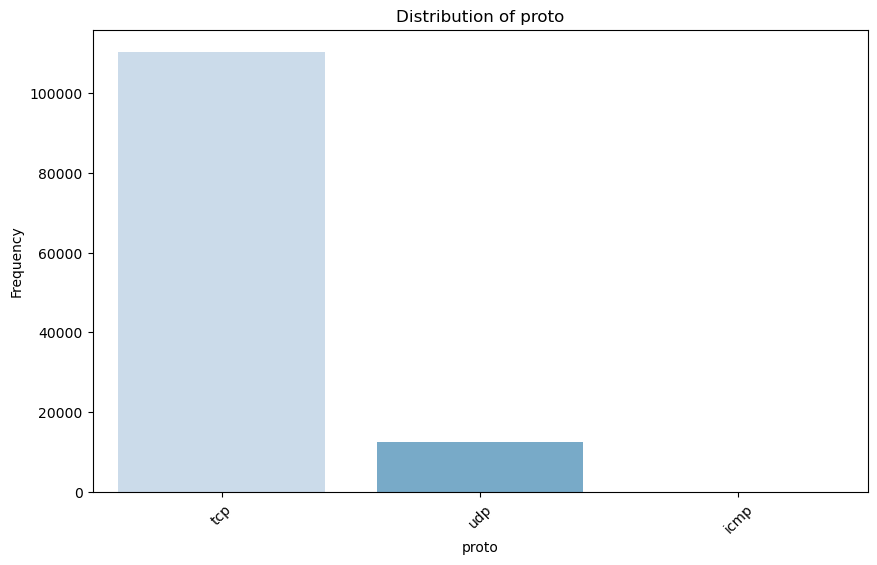

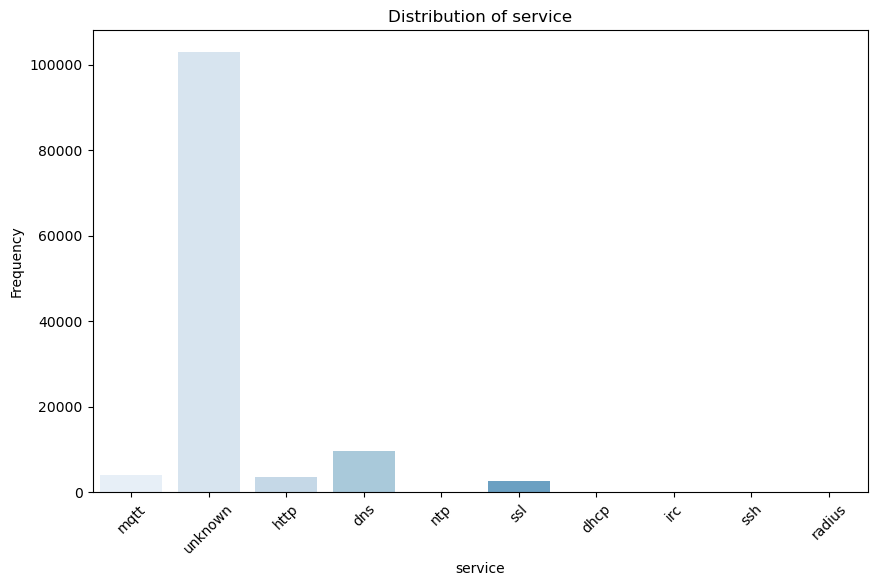

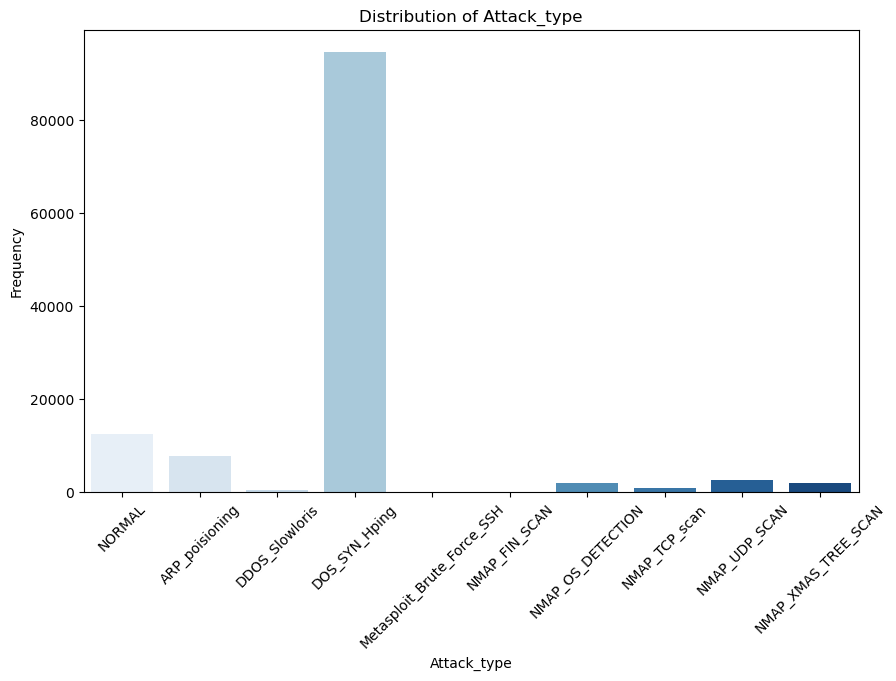

In [30]:
categories = ['proto', 'service', 'Attack_type']
for feature in categories:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df,palette ="Blues")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

##### <span style="color:#7fbce9;">Distribution of packets counts</span>

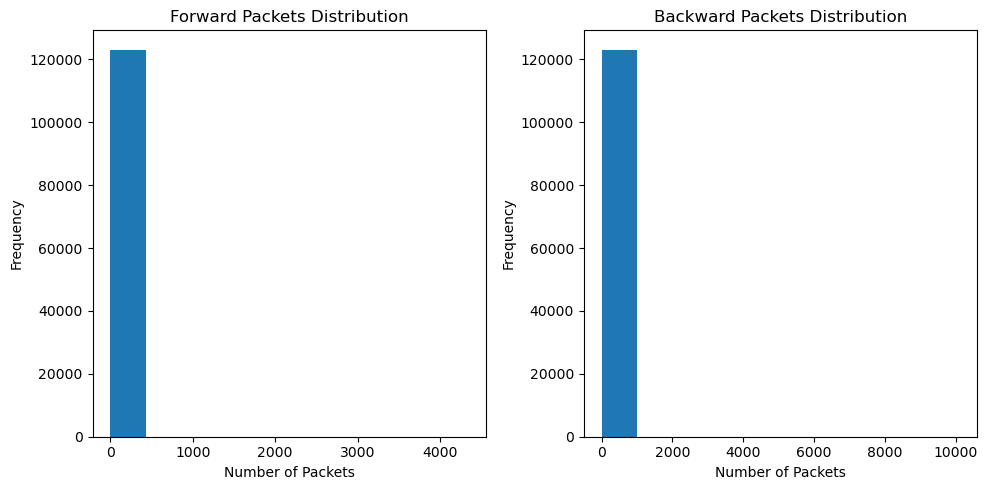

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(df['fwd_pkts_tot'])
axs[0].set_title('Forward Packets Distribution')
axs[0].set_xlabel('Number of Packets')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['bwd_pkts_tot'])
axs[1].set_title('Backward Packets Distribution')
axs[1].set_xlabel('Number of Packets')
axs[1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

##### <span style="color:#7fbce9;">Display distribution of packet sizes</span>

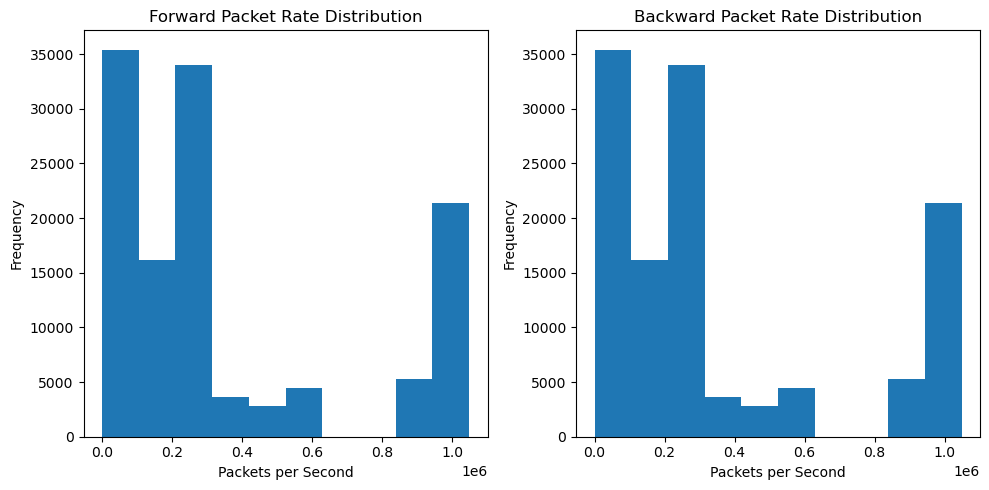

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].hist(df['fwd_pkts_per_sec'])
axs[0].set_title('Forward Packet Rate Distribution')
axs[0].set_xlabel('Packets per Second')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['bwd_pkts_per_sec'])
axs[1].set_title('Backward Packet Rate Distribution')
axs[1].set_xlabel('Packets per Second')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

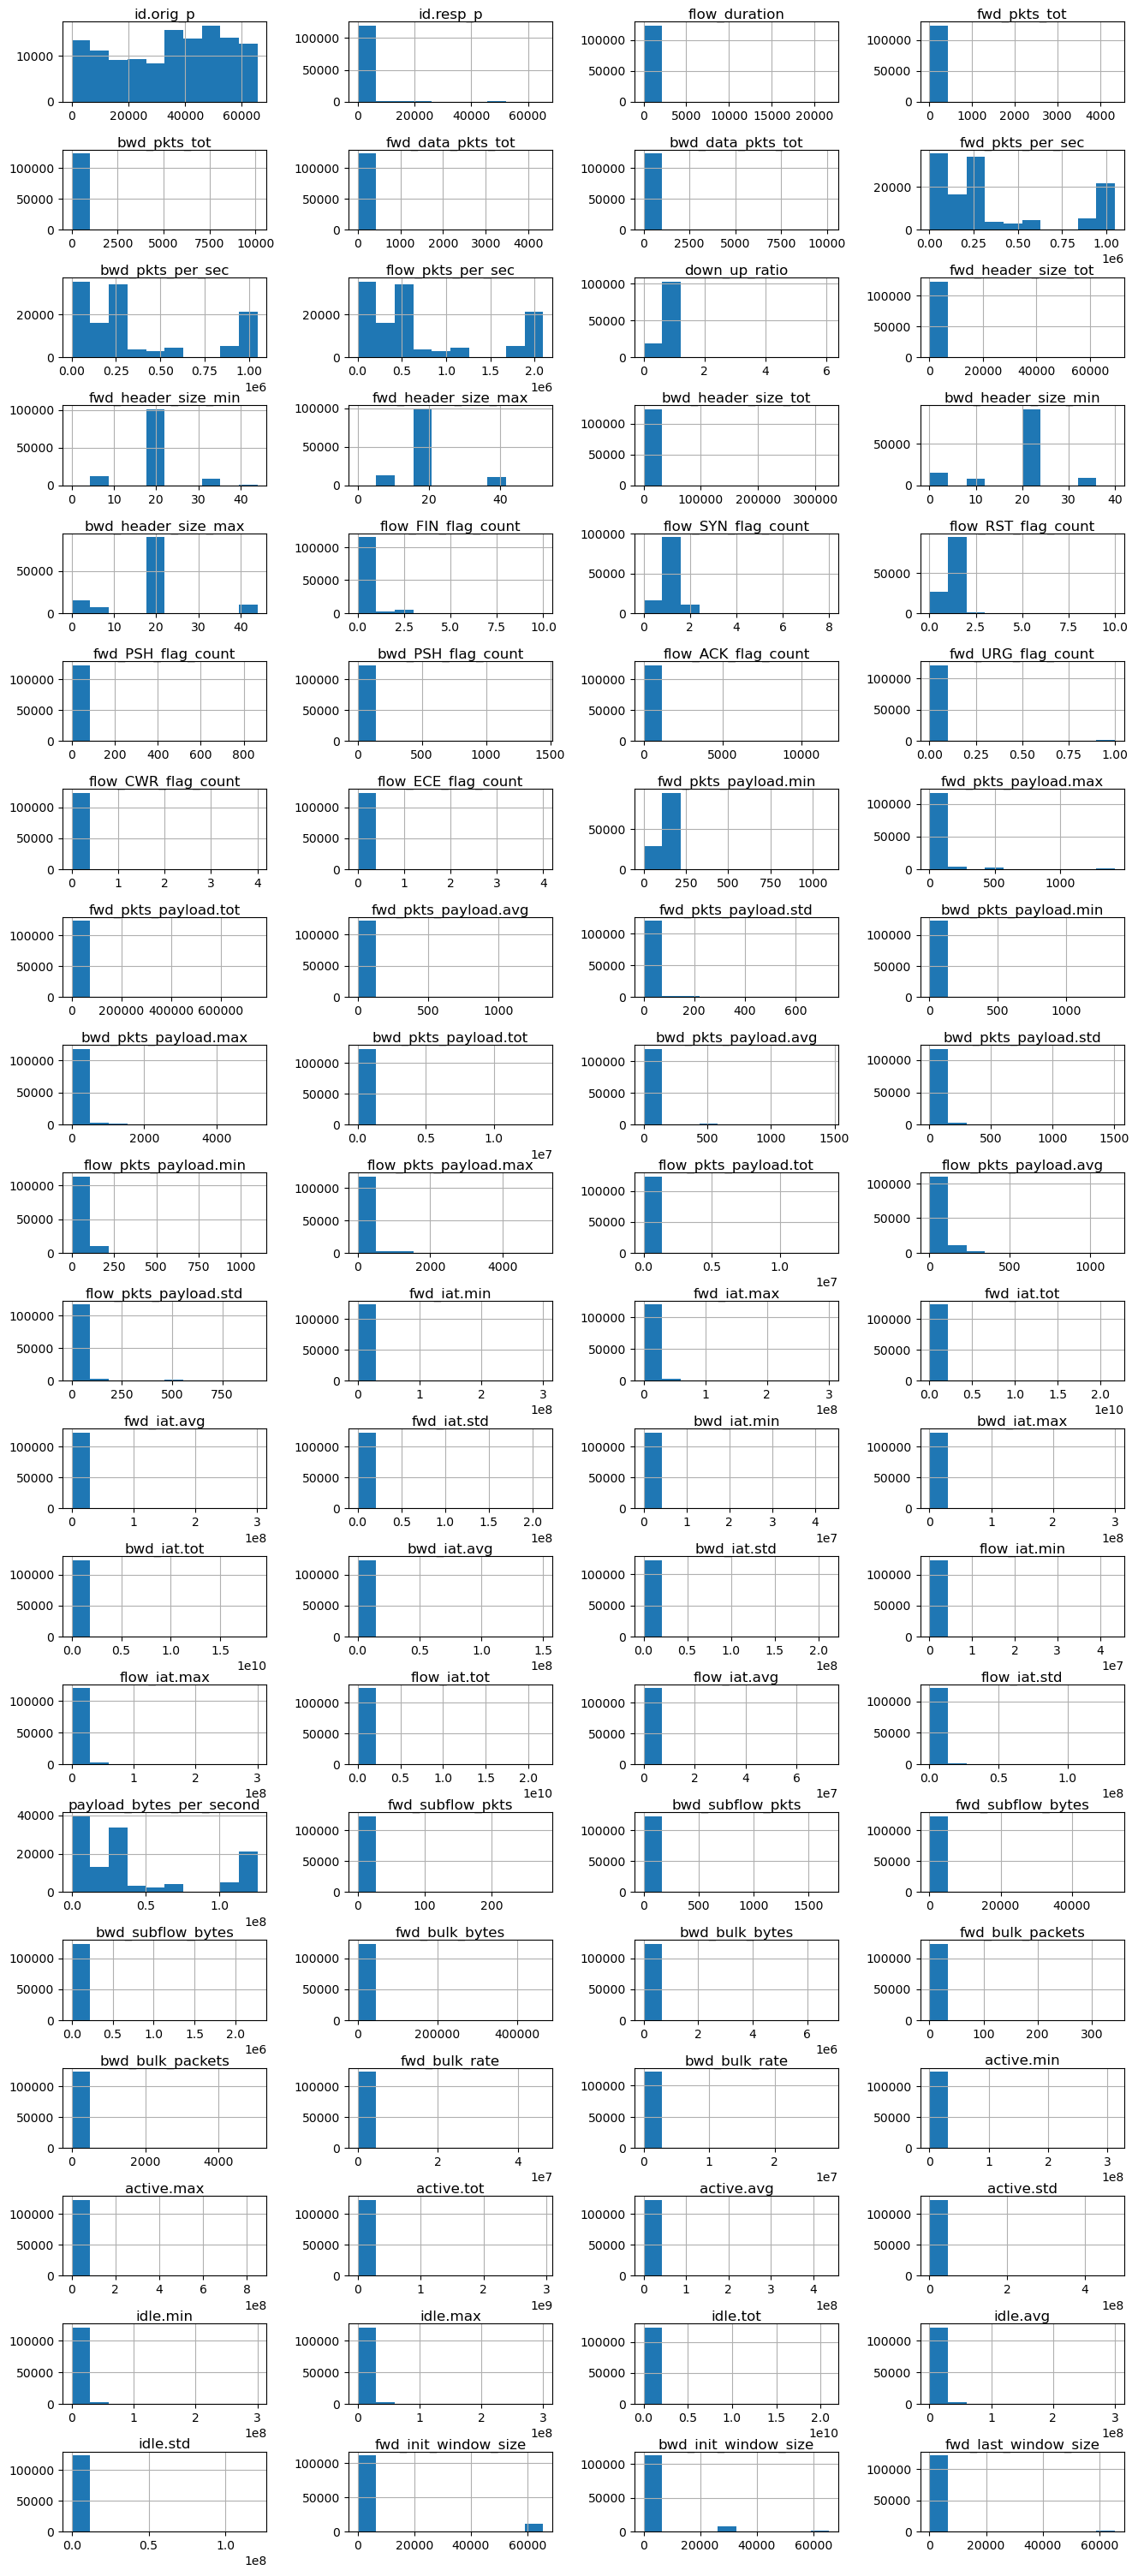

In [33]:
i=1
plt.figure(figsize=(16,40))
for col in num_cols:
    plt.subplot(21,4,i)
    plt.subplots_adjust(hspace=.6, wspace=.4)
    data[col].hist()
    plt.title(col, loc='center', y=.95)
    i +=1
plt.show()

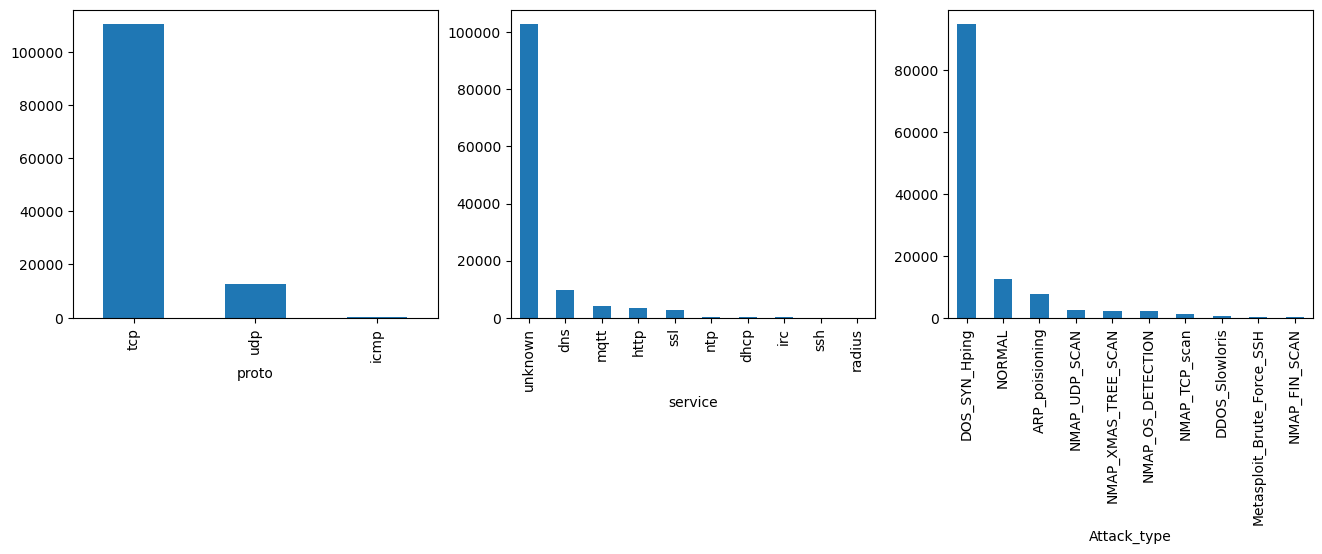

In [34]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
df['proto'].value_counts().plot(kind='bar')
plt.subplot(1,3,2)
df['service'].value_counts().plot(kind='bar')
plt.subplot(1,3,3)
df['Attack_type'].value_counts().plot(kind='bar')      

plt.show()

Target is showing imbalance

### <span style="color:	#6fa8dc;">Correlation</span>

- Range: Correlation values range from -1 to +1:

- +1 → Perfect positive correlation (when one increases, the other increases).

- 0 → No correlation (no relationship between variables).

- -1 → Perfect negative correlation (when one increases, the other decreases).

##### <span style="color:#7fbce9;">Calculate the correlation matrix</span>

In [35]:
correlation = num_cols.corr()
correlation

id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  \
id.orig_p              1.000000   0.168818       0.019978      0.040027   
id.resp_p              0.168818   1.000000       0.012719      0.005481   
flow_duration          0.019978   0.012719       1.000000      0.741707   
fwd_pkts_tot           0.040027   0.005481       0.741707      1.000000   
bwd_pkts_tot           0.021090  -0.004072       0.071395      0.407452   
...                         ...        ...            ...           ...   
idle.avg               0.121083   0.022665       0.123398      0.106671   
idle.std               0.028181   0.000354       0.112170      0.115612   
fwd_init_window_size   0.206620   0.036895       0.057173      0.132710   
bwd_init_window_size   0.178322  -0.011118       0.060731      0.147478   
fwd_last_window_size   0.075855   0.128522       0.003591      0.008330   

                      bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
id.orig_p                 0.021090           0.017724           0.017749   
id.resp_p                -0.004072           0.001625          -0.001290   
flow_duration             0.071395           0.754355           0.058859   
fwd_pkts_tot              0.407452           0.914683           0.379742   
bwd_pkts_tot              1.000000           0.094172           0.992956   
...                            ...                ...                ...   
idle.avg                  0.059080           0.040036           0.046673   
idle.std                  0.107515           0.051228           0.094403   
fwd_init_window_size      0.079270           0.035651           0.053777   
bwd_init_window_size      0.104156           0.046718           0.072643   
fwd_last_window_size      0.012885          -0.003717           0.011146   

                      fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  \
id.orig_p                    -0.095665         -0.095754          -0.095710   
id.resp_p                    -0.135708         -0.135704          -0.135707   
flow_duration                -0.027805         -0.027799          -0.027802   
fwd_pkts_tot                 -0.053855         -0.053875          -0.053865   
bwd_pkts_tot                 -0.026131         -0.026121          -0.026126   
...                                ...               ...                ...   
idle.avg                     -0.175402         -0.175363          -0.175383   
idle.std                     -0.039561         -0.039552          -0.039557   
fwd_init_window_size         -0.274301         -0.274652          -0.274478   
bwd_init_window_size         -0.259457         -0.259403          -0.259431   
fwd_last_window_size         -0.007777         -0.007762          -0.007770   

                      ...  active.avg  active.std  idle.min  idle.max  \
id.orig_p             ...    0.049005    0.003530  0.120457  0.120340   
id.resp_p             ...    0.005556   -0.000370  0.022867  0.022367   
flow_duration         ...    0.059808    0.041024  0.091827  0.136132   
fwd_pkts_tot          ...    0.218544    0.186920  0.087095  0.120481   
bwd_pkts_tot          ...    0.045700    0.042725  0.043270  0.070579   
...                   ...         ...         ...       ...       ...   
idle.avg              ...    0.206737    0.023730  0.992706  0.995069   
idle.std              ...    0.026651    0.042978  0.136860  0.327387   
fwd_init_window_size  ...    0.246291    0.031844  0.552291  0.550056   
bwd_init_window_size  ...    0.219481    0.049145  0.488590  0.499738   
fwd_last_window_size  ...    0.014587    0.011612 -0.001563 -0.000078   

                      idle.tot  idle.avg  idle.std  fwd_init_window_size  \
id.orig_p             0.019328  0.121083  0.028181              0.206620   
id.resp_p             0.012528  0.022665  0.000354              0.036895   
flow_duration         0.995023  0.123398  0.112170              0.057173   
fwd_pkts_tot          0.710351  0.106671  0.115612              0.132710   
bw

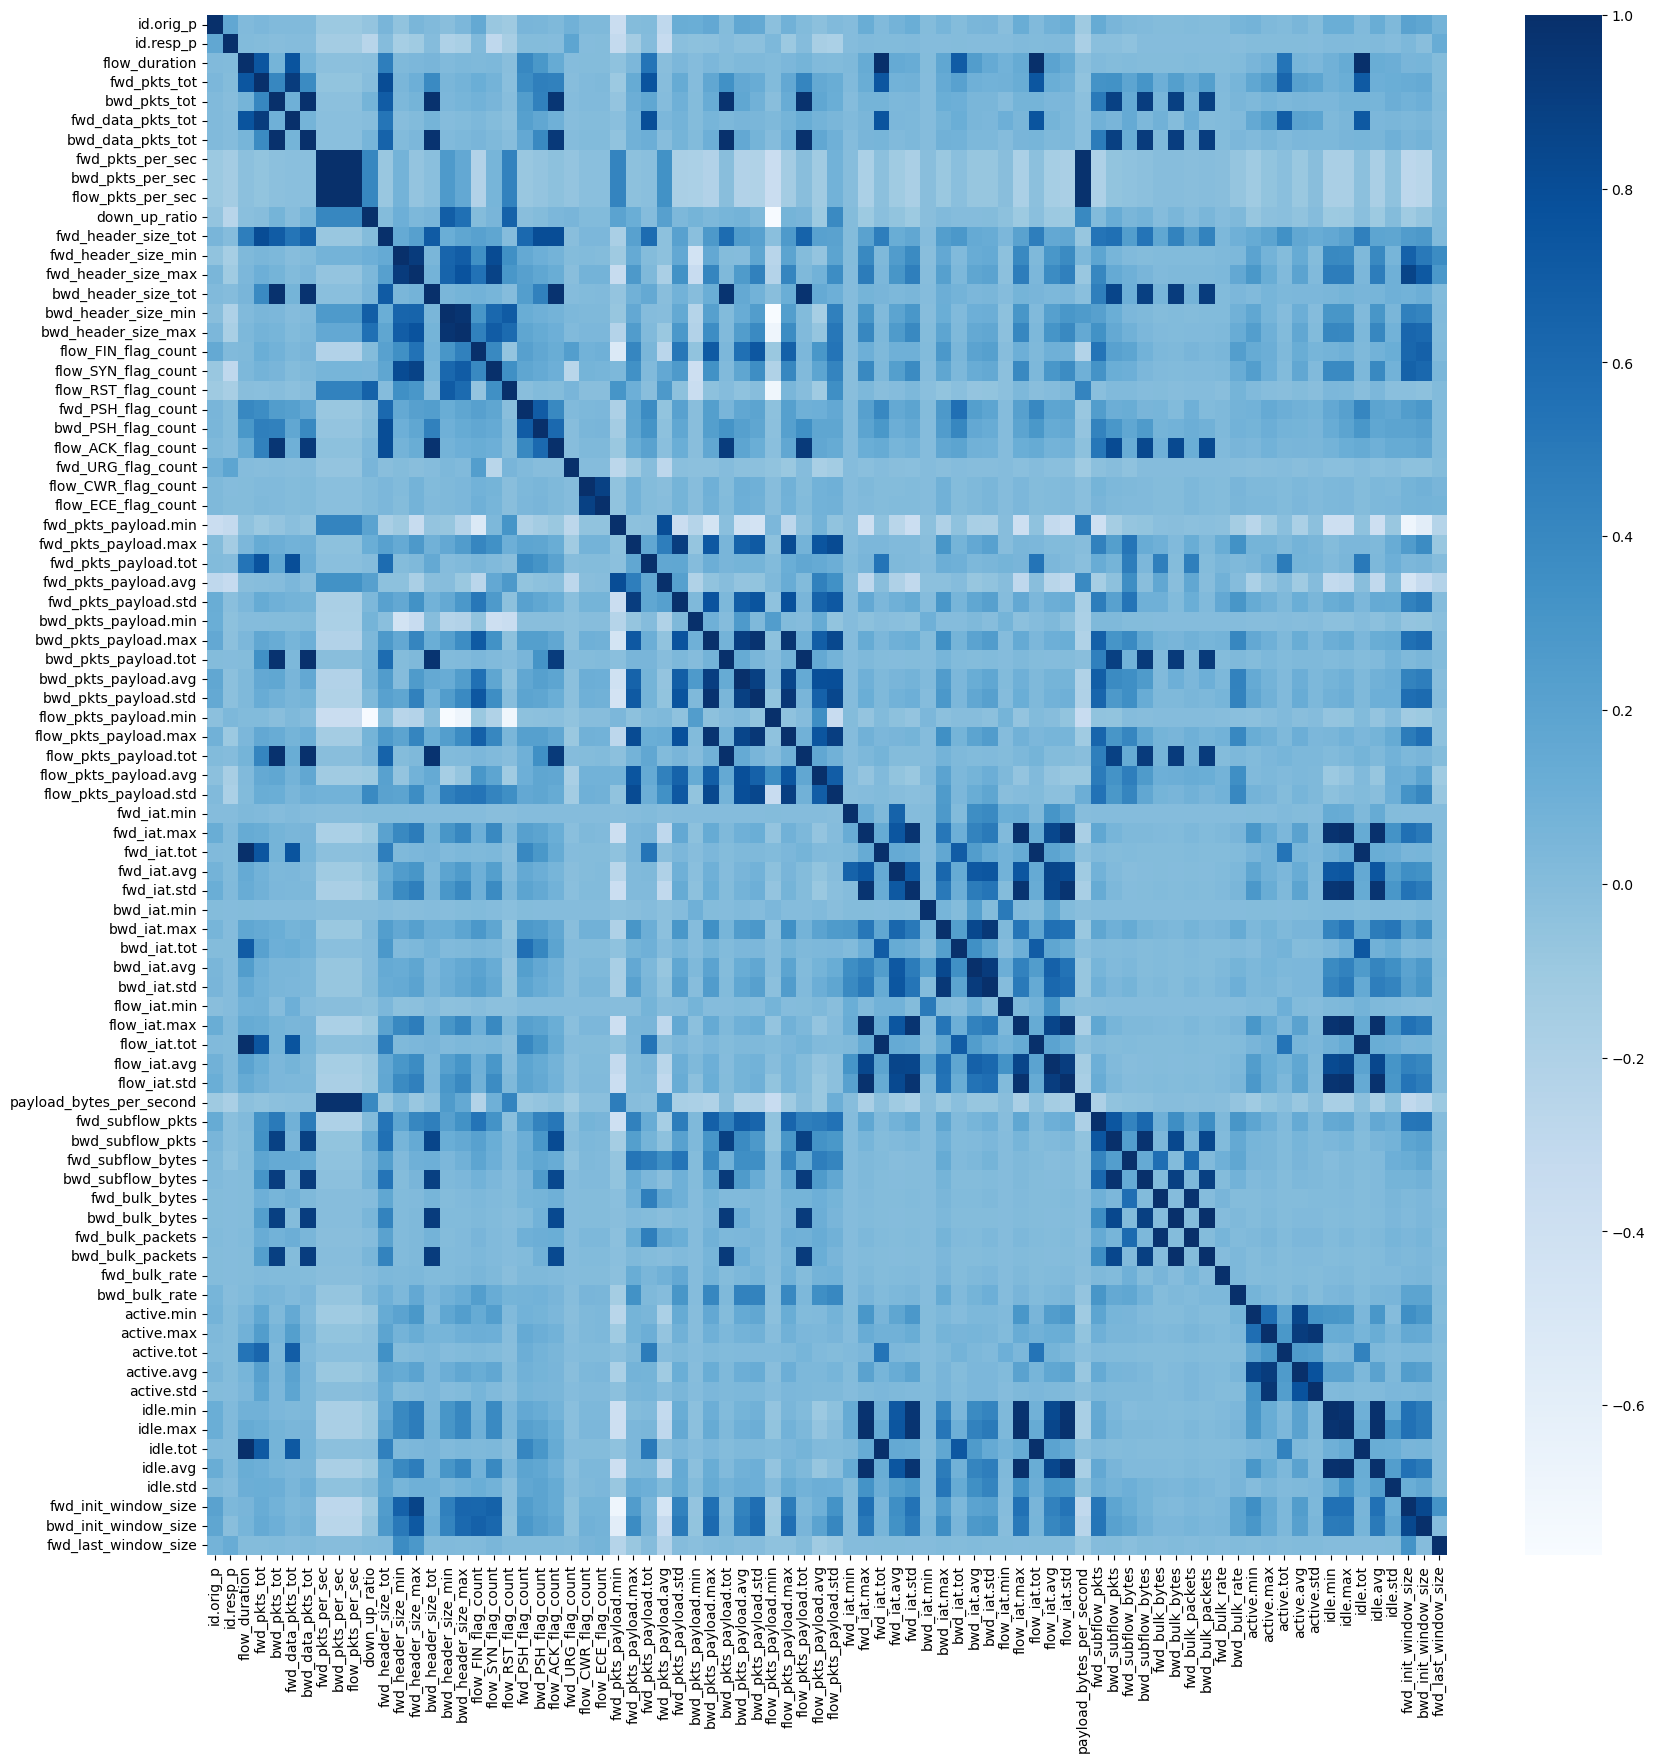

In [36]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=False, cmap='Blues')
plt.show()

Diagonal line (navy blue, value = 1) - Each variable is perfectly correlated with itself (correlation = 1).

Dark blue blocks (high positive correlation, ~1) - Variables with a strong positive relationship.

Bright to white areas (negative correlation, ~-1) - Variables with an inverse relationship.

Sky blue areas (~0 correlation) - Little to no correlation.

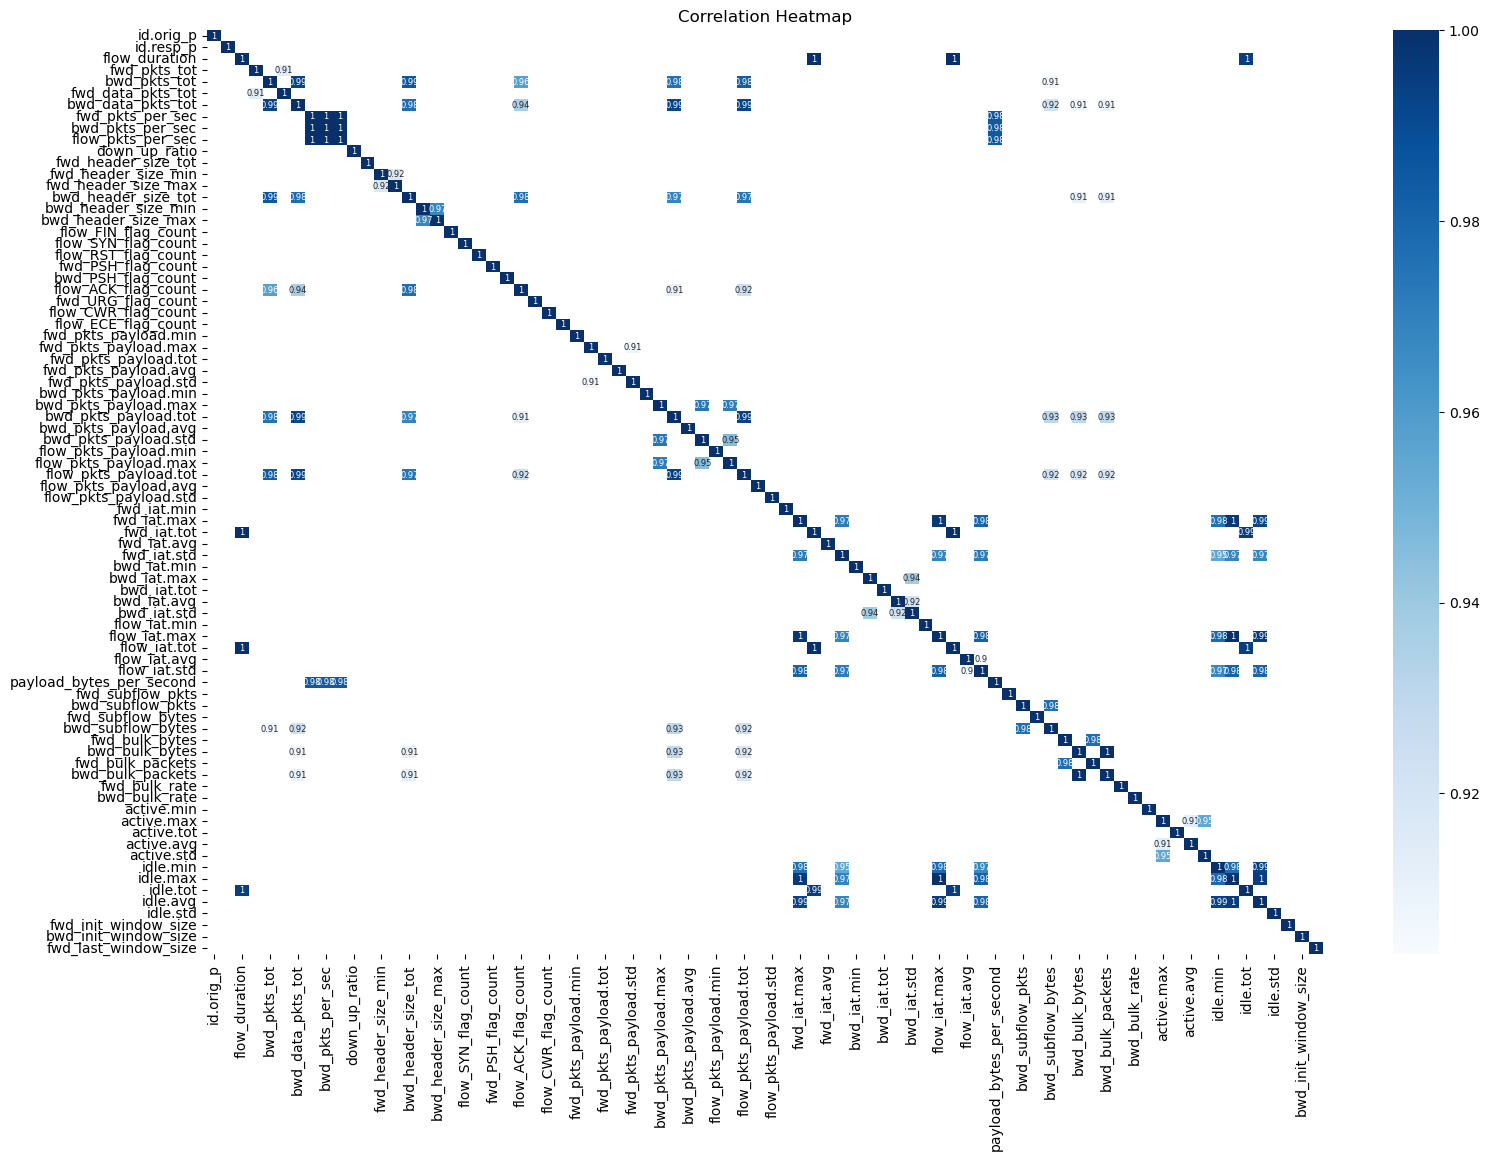

In [37]:
plt.figure(figsize=(18, 12))

sns.heatmap(correlation, cmap="Blues", annot=True, annot_kws={"size": 6},cbar=True, yticklabels=True, mask=np.abs(correlation) < 0.9)

plt.title("Correlation Heatmap")
plt.show()

In [38]:
dfc = df.copy()
dfc

id.orig_p  id.resp_p proto  service  flow_duration  fwd_pkts_tot  \
0           38667       1883   tcp     mqtt      32.011598             9   
1           51143       1883   tcp     mqtt      31.883584             9   
2           44761       1883   tcp     mqtt      32.124053             9   
3           60893       1883   tcp     mqtt      31.961063             9   
4           51087       1883   tcp     mqtt      31.902362             9   
...           ...        ...   ...      ...            ...           ...   
123112      59247      63331   tcp  unknown       0.000006             1   
123113      59247      64623   tcp  unknown       0.000007             1   
123114      59247      64680   tcp  unknown       0.000006             1   
123115      59247      65000   tcp  unknown       0.000006             1   
123116      59247      65129   tcp  unknown       0.000006             1   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0                  5                  3                  3          0.281148   
1                  5                  3                  3          0.282277   
2                  5                  3                  3          0.280164   
3                  5                  3                  3          0.281593   
4                  5                  3                  3          0.282111   
...              ...                ...                ...               ...   
123112             1                  0                  0     167772.160000   
123113             1                  0                  0     144631.172414   
123114             1                  0                  0     167772.160000   
123115             1                  0                  0     167772.160000   
123116             1                  0                  0     167772.160000   

        ...  active.std      idle.min      idle.max      idle.tot  \
0       ...         0.0  2.972918e+07  2.972918e+07  2.972918e+07   
1       ...         0.0  2.985528e+07  2.985528e+07  2.985528e+07   
2       ...         0.0  2.984215e+07  2.984215e+07  2.984215e+07   
3       ...         0.0  2.991377e+07  2.991377e+07  2.991377e+07   
4       ...         0.0  2.981470e+07  2.981470e+07  2.981470e+07   
...     ...         ...           ...           ...           ...   
123112  ...         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
123113  ...         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
123114  ...         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
123115  ...         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
123116  ...         0.0  0.000000e+00  0.000000e+00  0.000000e+00   

            idle.avg  idle.std  fwd_init_window_size  bwd_init_window_size  \
0       2.972918e+07       0.0                 64240                 26847   
1       2.985528e+07       0.0                 64240                 26847   
2       2.984215e+07       0.0                 64240                 26847   
3       2.991377e+07       0.0                 64240                 26847   
4       2.981470e+07       0.0                 64240                 26847   
...              ...       ...                   ...                   ...   
123112  0.000000e+00       0.0                  1024                     0   
123113  0.000000e+00       0.0                  1024                     0   
123114  0.000000e+00       0.0                  1024                     0   
123115  0.000000e+00       0.0                  1024                     0   
123116  0.000000e+00       0.0                  1024                     0   

        fwd_last_window_size          Attack_type  
0                        502               NORMAL  
1                        502               NORMAL  
2                        502               NORMAL  
3                        502               NORMAL  
4                        502               NORMAL  
...                      ...                  ...  
1231

In [39]:
X = dfc.drop(columns=['Attack_type'])  
y = dfc['Attack_type']

In [40]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 83 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  i

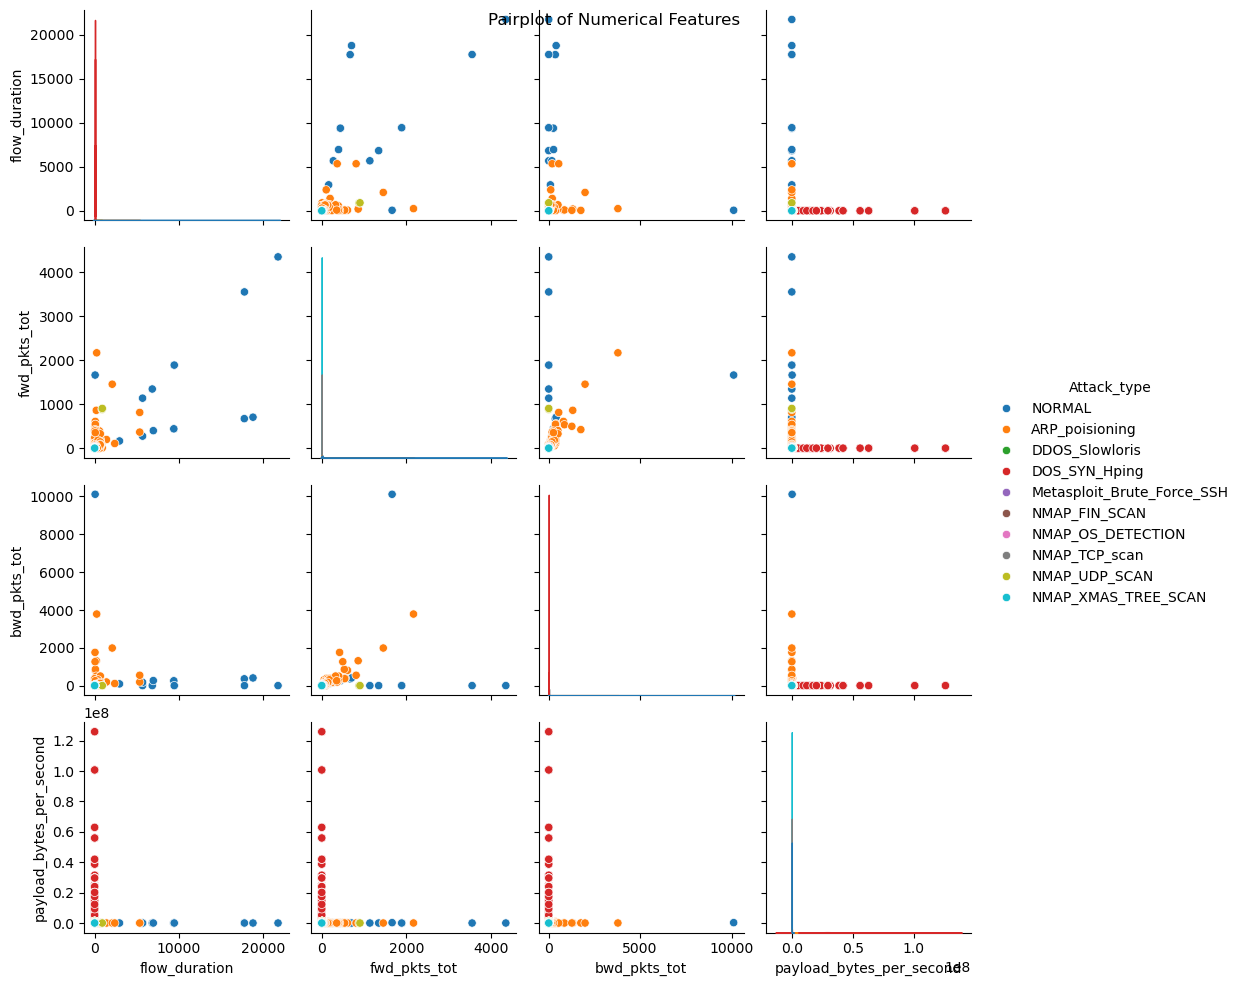

In [41]:
sns.pairplot(dfc[['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'payload_bytes_per_second', 'Attack_type']], hue='Attack_type')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

#### Key Observations:

###### Attack Classification by Traffic Patterns:

DOS_SYN_Hping (green dots): Characterized by very high payload bytes per second (up to 1.3×10⁸) but low packet counts and short flow durations
MQTT_Publish (pink dots): Shows extremely high backward packet counts (around 10,000) but relatively low forward packets
Wipro_bulb (gold/brown dots): Shows instances with very high flow durations (15,000-20,000) and high forward packet counts


###### Flow Duration Patterns:

Most attacks have short flow durations except for Wipro_bulb attacks
DOS_SYN_Hping attacks consistently have very short durations
The first panel shows an extreme outlier in flow duration (green vertical line)


###### Packet Distribution:

Forward vs backward packet counts vary significantly by attack type
NMAP scans (various shades of blue/purple) typically have low packet counts in both directions
ARP_poisioning (light green) shows moderate packet counts


###### Payload Characteristics:

DOS_SYN_Hping attacks show a distinct pattern with high payload bytes per second
Most other attacks have very low payload bytes per second
The rightmost column shows clear separation between DOS_SYN_Hping and all other attack types


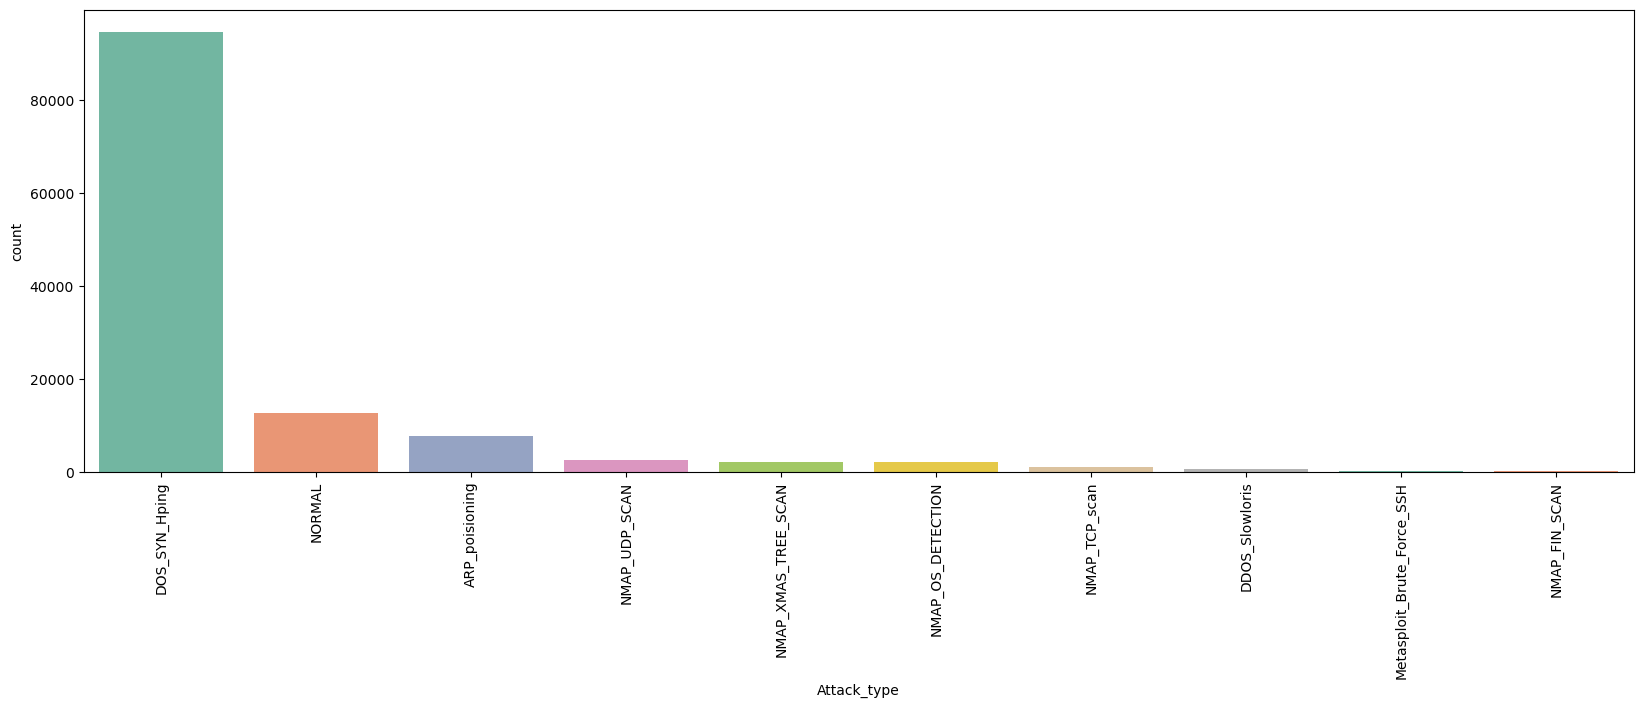

In [42]:
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=df,x=df['Attack_type'],order=df['Attack_type'].value_counts().index,palette ='Set2')
plt.xticks(rotation=90)
plt.show()

## <span style="color:	#4583bb;">3. Feature Engineering:</span>

### <span style="color:#6fa8dc;">Encoding Proto and Service Columns</span>

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

encoded_cols = ['proto', 'service']
for col in encoded_cols:
    dfc[col] = le.fit_transform(dfc[col]) 

In [44]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

In [45]:
dfc.head()

id.orig_p  id.resp_p  proto  service  flow_duration  fwd_pkts_tot  \
0      38667       1883      1        4      32.011598             9   
1      51143       1883      1        4      31.883584             9   
2      44761       1883      1        4      32.124053             9   
3      60893       1883      1        4      31.961063             9   
4      51087       1883      1        4      31.902362             9   

   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  ...  \
0             5                  3                  3          0.281148  ...   
1             5                  3                  3          0.282277  ...   
2             5                  3                  3          0.280164  ...   
3             5                  3                  3          0.281593  ...   
4             5                  3                  3          0.282111  ...   

   active.std      idle.min      idle.max      idle.tot      idle.avg  \
0         0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07   
1         0.0  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07   
2         0.0  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07   
3         0.0  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07   
4         0.0  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07   

   idle.std  fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0       0.0                 64240                 26847                   502   
1       0.0                 64240                 26847                   502   
2       0.0                 64240                 26847                   502   
3       0.0                 64240                 26847                   502   
4       0.0                 64240                 26847                   502   

   Attack_type  
0       NORMAL  
1       NORMAL  
2       NORMAL  
3       NORMAL  
4       NORMAL  

[5 rows x 83 columns]

### <span style="color:#7fbce9;">Handling Outliers</span>

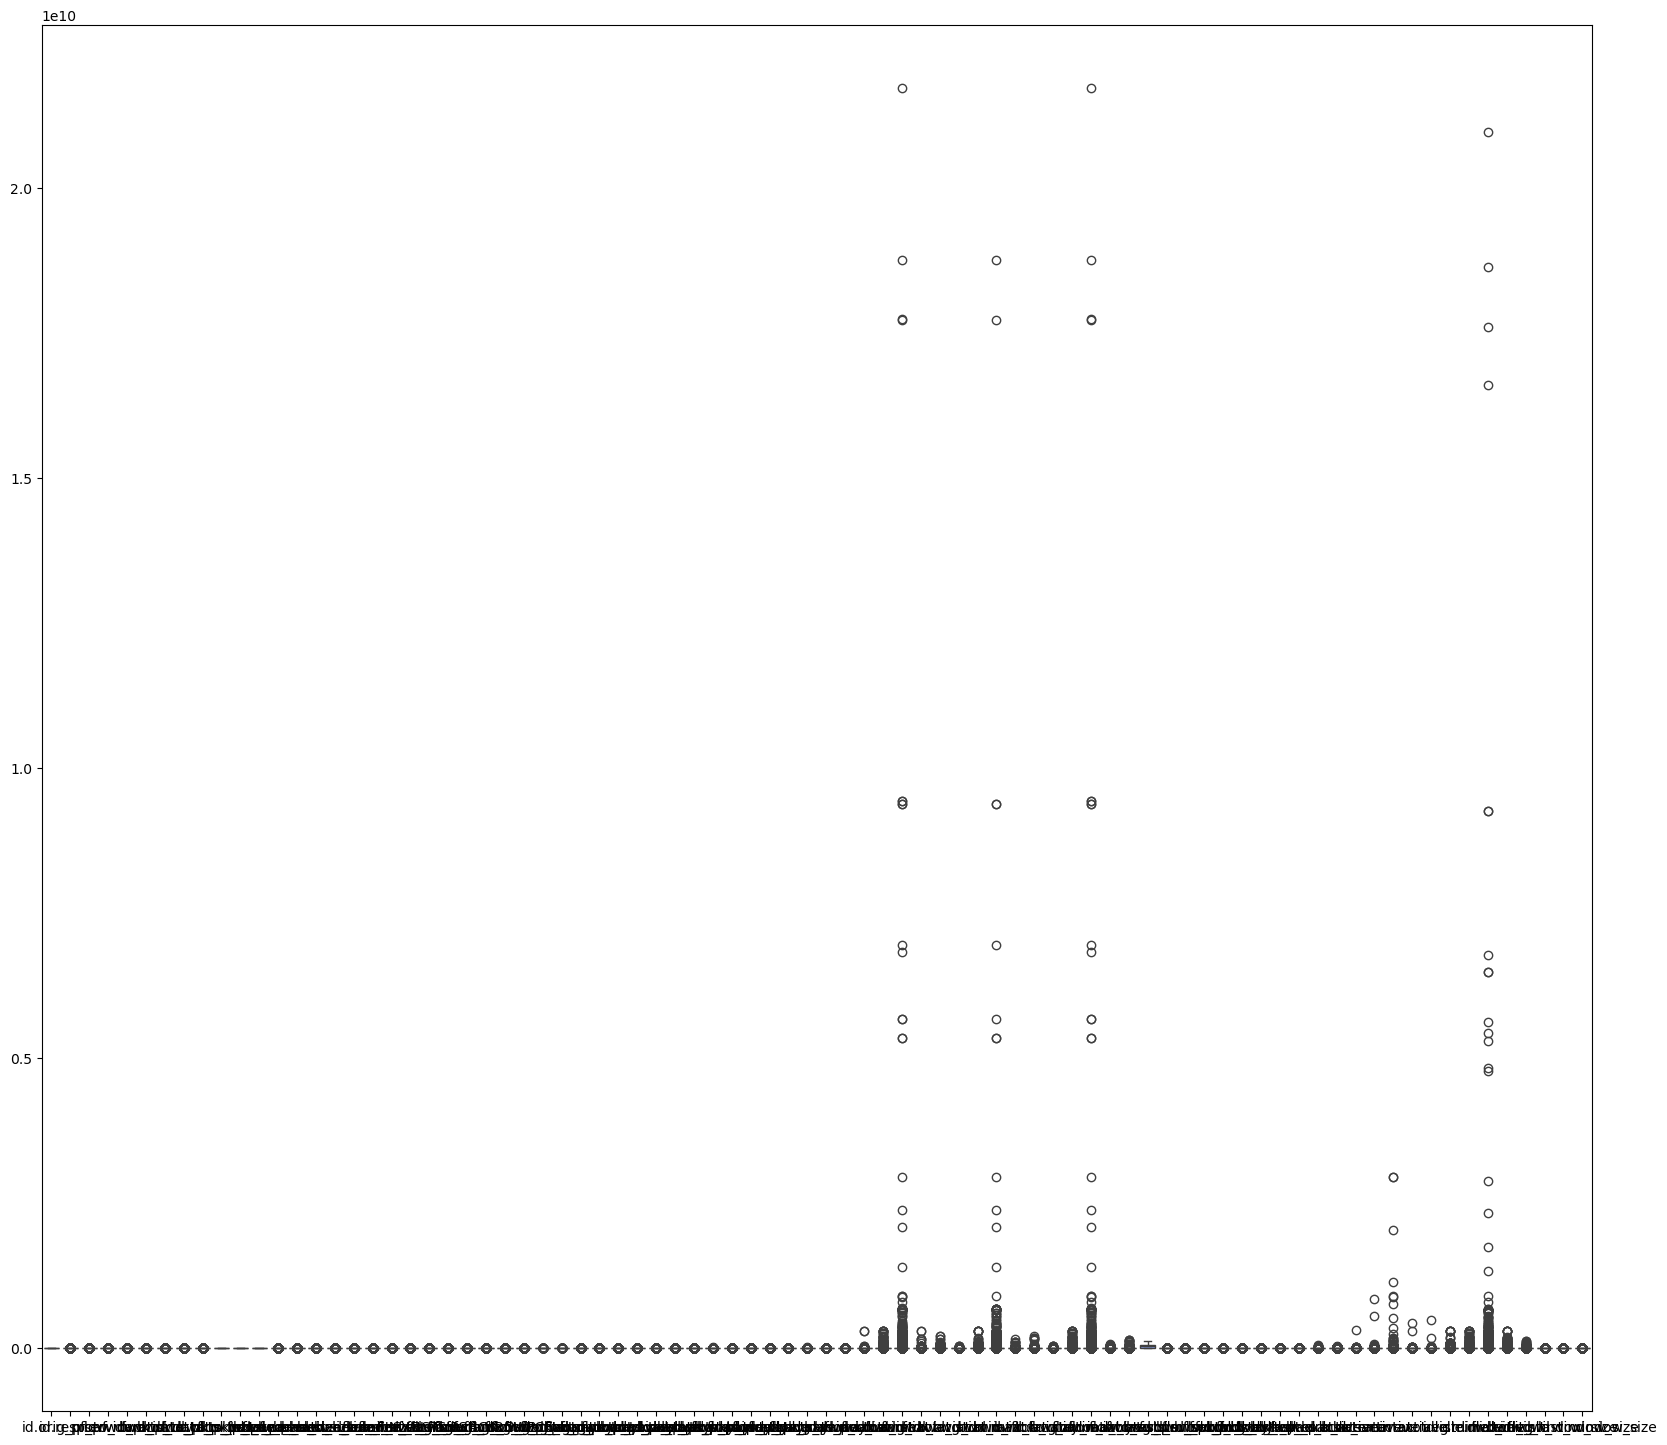

In [46]:
plt.figure(figsize = (20,18))
sns.boxplot(dfc)
plt.show()

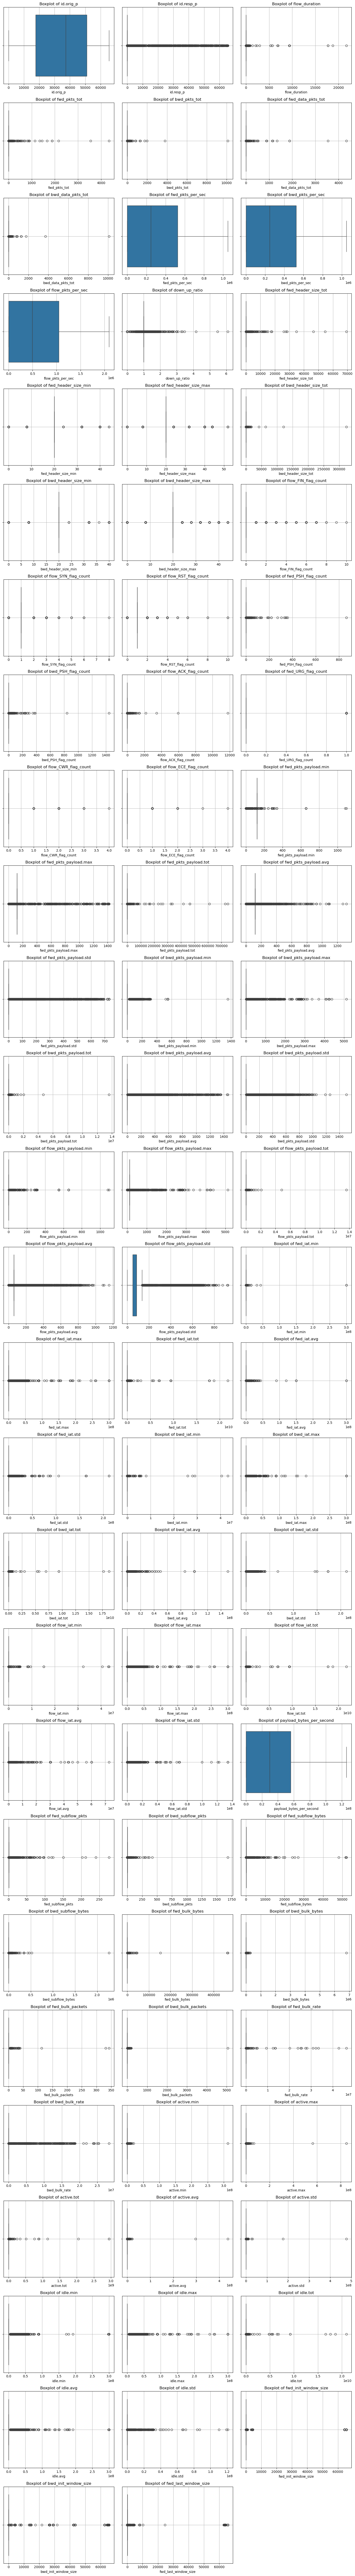

In [47]:
import math

num_features = len(num_cols.columns)
rows = math.ceil(num_features / 3)  # Arrange plots in rows of 3

fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()  # Flatten in case of uneven grid

for i, col in enumerate(num_cols.columns):
    sns.boxplot(data=dfc, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### <span style="color:#7fbce9;">Using IQR Method to Handle Outliers</span>

In [48]:
def handling_outliers(dfc):
    for col in df.select_dtypes(include = "number").columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        
        Lower_bound = Q1 - (1.5 * IQR) 
        Upper_bound = Q3 + (1.5 * IQR)

        dfc[col] = df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)

    return(dfc)

In [49]:
df1 = handling_outliers(dfc)

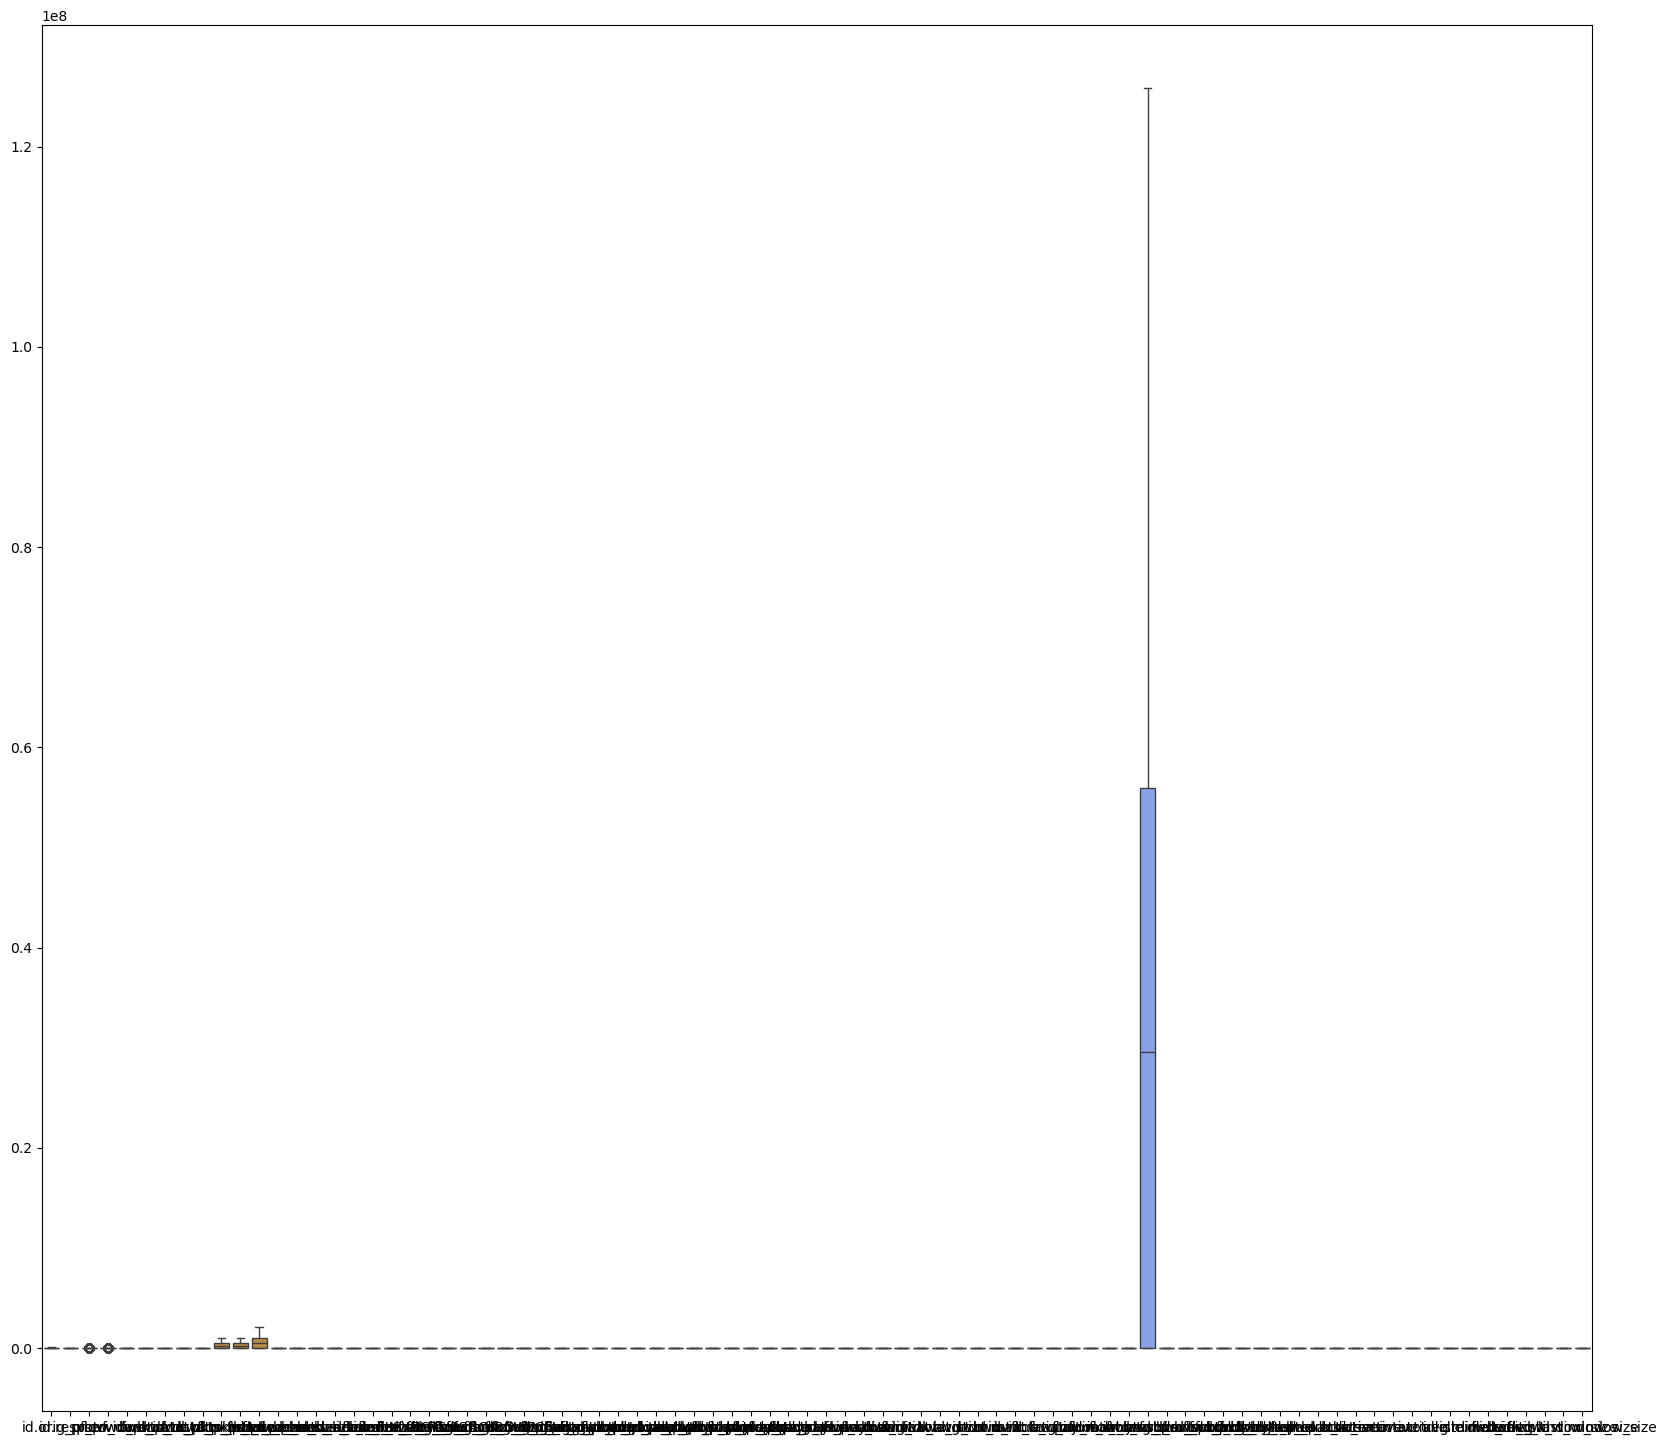

In [50]:
plt.figure(figsize = (20,18))
sns.boxplot(df1)
plt.show()

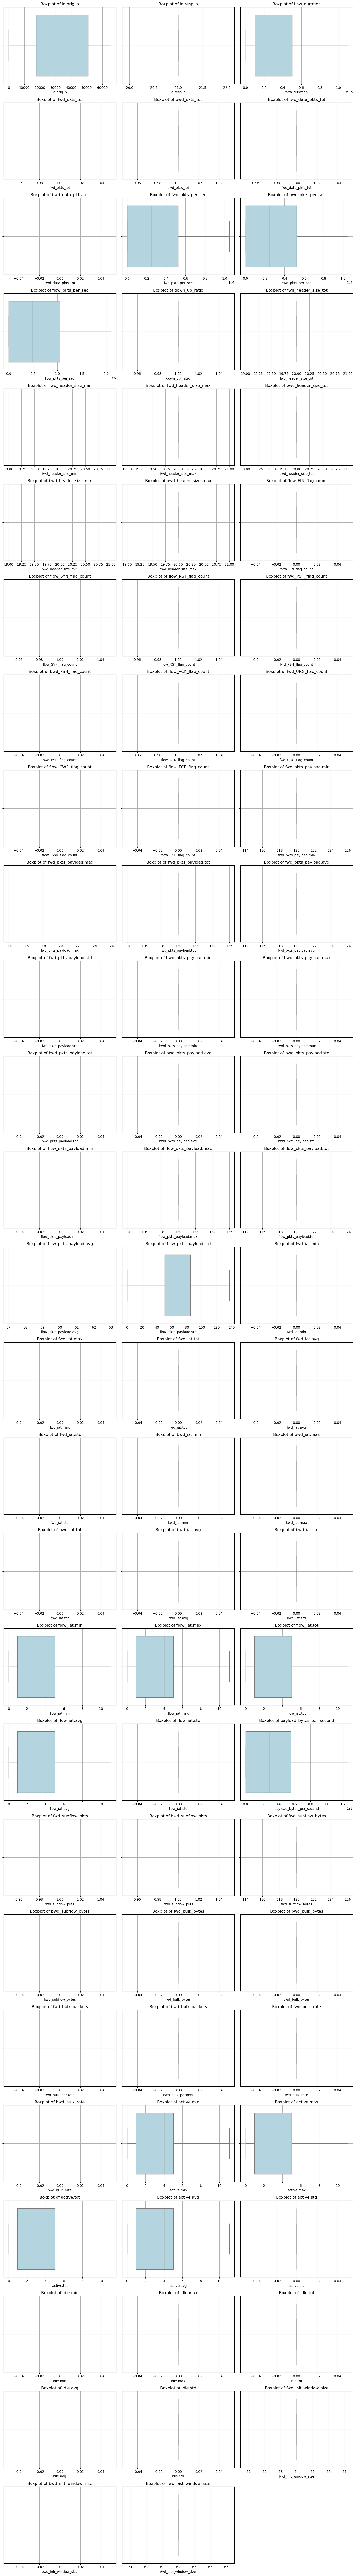

In [51]:
num_features = len(num_cols.columns)
rows = math.ceil(num_features / 3)  # Arrange plots in rows of 3

fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()  # Flatten in case of uneven grid

for i, col in enumerate(num_cols.columns):
    sns.boxplot(data=df1, x=col, ax=axes[i],color = '#ADD8E6')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### <span style="color:#6fa8dc;">Feature Selection</span>

In [52]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

##### <span style="color:#7fbce9;">Calculate mutual information scores</span>

In [55]:
sk = SelectKBest(mutual_info_classif, k= 30)

In [53]:
X = df1.drop(columns=['Attack_type'])  
y = df1['Attack_type']

In [56]:
X_new = sk.fit_transform(X,y)

In [57]:
selected_features = X.columns[sk.get_support()]
feature_score = pd.DataFrame({'feature':X.columns,'Score':sk.scores_}).sort_values(by='Score',ascending=False)
print("selected_Fetaures:",selected_features)
print("\nFeature Score:")
print(feature_score)

selected_Fetaures: Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'fwd_data_pkts_tot', 'fwd_pkts_per_sec',
       'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'fwd_header_size_tot',
       'fwd_header_size_min', 'bwd_header_size_tot', 'bwd_header_size_min',
       'bwd_header_size_max', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'flow_pkts_payload.std', 'flow_iat.min', 'flow_iat.max', 'flow_iat.tot',
       'flow_iat.avg', 'payload_bytes_per_second', 'fwd_subflow_pkts',
       'bwd_subflow_pkts', 'active.min', 'active.max', 'active.tot',
       'active.avg', 'fwd_init_window_size'],
      dtype='object')

Feature Score:
                     feature     Score
42     flow_pkts_payload.std  0.604429
9           fwd_pkts_per_sec  0.601019
11         flow_pkts_per_sec  0.599224
10          bwd_pkts_per_sec  0.595669
58  payload_bytes_per_second  0.587867
..                       ...       ...
51               bwd_iat.avg  0.000000
73      

In [58]:
X_selected = X[selected_features]
X_selected.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'fwd_data_pkts_tot', 'fwd_pkts_per_sec',
       'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'fwd_header_size_tot',
       'fwd_header_size_min', 'bwd_header_size_tot', 'bwd_header_size_min',
       'bwd_header_size_max', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'flow_pkts_payload.std', 'flow_iat.min', 'flow_iat.max', 'flow_iat.tot',
       'flow_iat.avg', 'payload_bytes_per_second', 'fwd_subflow_pkts',
       'bwd_subflow_pkts', 'active.min', 'active.max', 'active.tot',
       'active.avg', 'fwd_init_window_size'],
      dtype='object')

### <span style="color:#6fa8dc;">Scaling</span>

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_selected)
x_scaled

array([[ 0.21120223,  0.        , -0.33560483, ...,  2.00518752,
         2.00518752,  0.        ],
       [ 0.8654049 ,  0.        , -0.33560483, ...,  2.00518752,
         2.00518752,  0.        ],
       [ 0.53075265,  0.        , -0.33560483, ...,  2.00518752,
         2.00518752,  0.        ],
       ...,
       [ 1.29035347,  0.        , -0.33560483, ...,  0.55771068,
         0.55771068,  0.        ],
       [ 1.29035347,  0.        , -0.33560483, ...,  0.55771068,
         0.55771068,  0.        ],
       [ 1.29035347,  0.        , -0.33560483, ...,  0.55771068,
         0.55771068,  0.        ]])

### <span style="color:#6fa8dc;">Handling Imbalance Data</span>

In [63]:
#!pip install imbalanced-learn

In [60]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [61]:
X = df1.drop(columns=['Attack_type'])  
y = df1['Attack_type']

In [62]:
# Step 1: Find the minimum class size
min_class_count = min(Counter(y).values())

# Step 2: Undersample DOS_SYN_Hping to match the minority class count
undersample = RandomUnderSampler(sampling_strategy={'DOS_SYN_Hping': min_class_count}, random_state=42)

# Step 3: Apply SMOTE to oversample all other classes to match this count
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Step 4: Apply undersampling & oversampling together
X_train_under, y_train_under = undersample.fit_resample(X, y)
X_resampled, y_resampled = smote.fit_resample(X_train_under, y_train_under)

# Step 5: Print new class distribution
print("Balanced class distribution:", Counter(y_resampled))

Balanced class distribution: Counter({'ARP_poisioning': 12507, 'DDOS_Slowloris': 12507, 'DOS_SYN_Hping': 12507, 'Metasploit_Brute_Force_SSH': 12507, 'NMAP_FIN_SCAN': 12507, 'NMAP_OS_DETECTION': 12507, 'NMAP_TCP_scan': 12507, 'NMAP_UDP_SCAN': 12507, 'NMAP_XMAS_TREE_SCAN': 12507, 'NORMAL': 12507})


In [63]:
print('Original unbalanced dataset shape', len(dfc))
print('Resampled balanced dataset shape', len(y_resampled))

Original unbalanced dataset shape 123117
Resampled balanced dataset shape 125070


In [64]:
balanced_df = pd.DataFrame(X_resampled, columns=list(i for i in list(df1.describe(include='all').columns) if i != 'Attack_type'))

In [65]:
df1.shape

(123117, 83)

In [66]:
balanced_df.shape

(125070, 82)

In [67]:
y.value_counts()

Attack_type
DOS_SYN_Hping                 94659
NORMAL                        12507
ARP_poisioning                 7750
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [68]:
y_resampled.value_counts()

Attack_type
ARP_poisioning                12507
DDOS_Slowloris                12507
DOS_SYN_Hping                 12507
Metasploit_Brute_Force_SSH    12507
NMAP_FIN_SCAN                 12507
NMAP_OS_DETECTION             12507
NMAP_TCP_scan                 12507
NMAP_UDP_SCAN                 12507
NMAP_XMAS_TREE_SCAN           12507
NORMAL                        12507
Name: count, dtype: int64

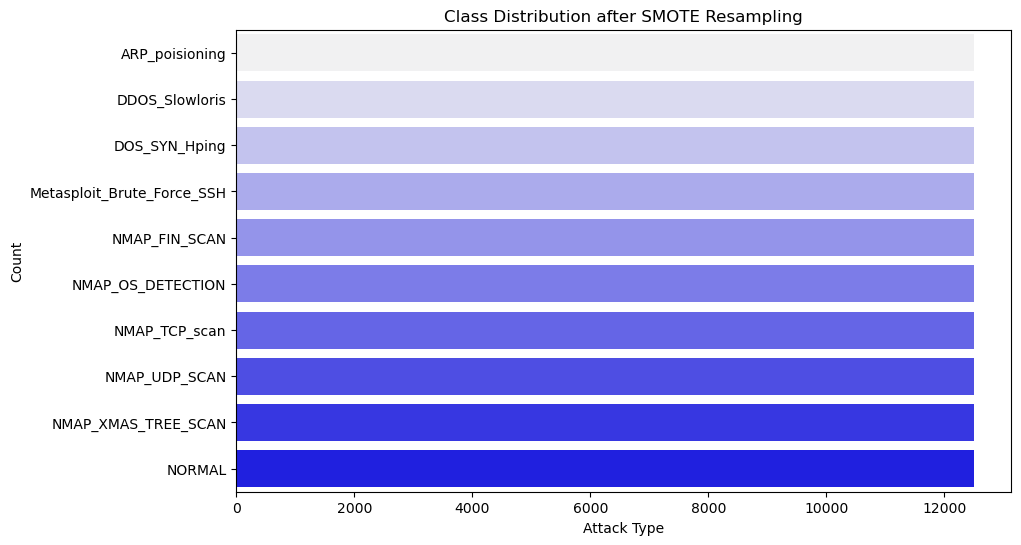

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(y_resampled, palette ='light:b')
plt.title('Class Distribution after SMOTE Resampling')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

In [70]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125070 entries, 0 to 125069
Data columns (total 82 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 125070 non-null  int64  
 1   id.resp_p                 125070 non-null  float64
 2   proto                     125070 non-null  int64  
 3   service                   125070 non-null  int64  
 4   flow_duration             125070 non-null  float64
 5   fwd_pkts_tot              125070 non-null  float64
 6   bwd_pkts_tot              125070 non-null  float64
 7   fwd_data_pkts_tot         125070 non-null  float64
 8   bwd_data_pkts_tot         125070 non-null  float64
 9   fwd_pkts_per_sec          125070 non-null  float64
 10  bwd_pkts_per_sec          125070 non-null  float64
 11  flow_pkts_per_sec         125070 non-null  float64
 12  down_up_ratio             125070 non-null  float64
 13  fwd_header_size_tot       125070 non-null  f

In [71]:
balanced_df.describe()

id.orig_p  id.resp_p          proto        service  flow_duration  \
count  125070.000000   125070.0  125070.000000  125070.000000  125070.000000   
mean    46570.875957       21.0       1.213400       6.636707       0.000006   
std     12175.580105        0.0       0.411035       3.227932       0.000005   
min         0.000000       21.0       0.000000       0.000000       0.000000   
25%     39622.000000       21.0       1.000000       2.000000       0.000001   
50%     49633.000000       21.0       1.000000       9.000000       0.000006   
75%     55161.000000       21.0       1.000000       9.000000       0.000011   
max     65486.000000       21.0       2.000000       9.000000       0.000011   

       fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
count      125070.0      125070.0           125070.0           125070.0   
mean            1.0           1.0                1.0                0.0   
std             0.0           0.0                0.0                0.0   
min             1.0           1.0                1.0                0.0   
25%             1.0           1.0                1.0                0.0   
50%             1.0           1.0                1.0                0.0   
75%             1.0           1.0                1.0                0.0   
max             1.0           1.0                1.0                0.0   

       fwd_pkts_per_sec  ...     active.avg  active.std  idle.min  idle.max  \
count      1.250700e+05  ...  125070.000000    125070.0  125070.0  125070.0   
mean       1.338812e+05  ...       6.153479         0.0       0.0       0.0   
std        2.592120e+05  ...       4.618994         0.0       0.0       0.0   
min        0.000000e+00  ...       0.000000         0.0       0.0       0.0   
25%        2.274132e-01  ...       0.953674         0.0       0.0       0.0   
50%        5.321404e+01  ...       5.960464         0.0       0.0       0.0   
75%        1.677722e+05  ...      11.086464         0.0       0.0       0.0   
max        1.048576e+06  ...      11.086464         0.0       0.0       0.0   

       idle.tot  idle.avg  idle.std  fwd_init_window_size  \
count  125070.0  125070.0  125070.0              125070.0   
mean        0.0       0.0       0.0                  64.0   
std         0.0       0.0       0.0                   0.0   
min         0.0       0.0       0.0                  64.0   
25%         0.0       0.0       0.0                  64.0   
50%         0.0       0.0       0.0                  64.0   
75%         0.0       0.0       0.0                  64.0   
max         0.0       0.0       0.0                  64.0   

       bwd_init_window_size  fwd_last_window_size  
count              125070.0              125070.0  
mean                    0.0                  64.0  
std                     0.0                   0.0  
min                     0.0                  64.0  
25%                     0.0                  64.0  
50%                     0.0                  64.0  
75%                     0.0                  64.0  
max                     0.0                  64.0  

[8 rows x 82 columns]

In [72]:
balanced_df.duplicated().sum()

np.int64(42612)

In [73]:
balanced_df.drop_duplicates(inplace = True)

In [74]:
balanced_df.duplicated().sum()

np.int64(0)

Removed duplicates

### <span style="color:#6fa8dc;">Checking for null values</span>

In [75]:
balanced_df.isna().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.avg                0
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Length: 82, dtype: int64

In [76]:
balanced_df.isnull().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.avg                0
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Length: 82, dtype: int64

No null values detected

In [77]:
balanced_df.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'flow_CWR_flag_count', 'flow_ECE_flag_count', 'fwd_pkts_payload.min',
       'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg',
       'fwd_pkts_payload.std', 'bwd_pkts_payload.min', 'bwd_pkts_payload.max',
       'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.std',
       'flow_pkts_payload.min', 'flow_pkts_payload.max',
       'flow_pkts_payload.tot', 'flow_pkts_payload.avg',
     

### <span style="color:#6fa8dc;">Splitting Data</span>

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [80]:
print(f""" 
X_train shape : {x_train.shape}
X_test shape : {x_test.shape}
y_train shape : {y_train.shape}
y_test shape : {y_test.shape} 
""")

 
X_train shape : (100056, 82)
X_test shape : (25014, 82)
y_train shape : (100056,)
y_test shape : (25014,) 



### <span style="color:#6fa8dc;">Model Building - Classification Models</span>

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [82]:
Models = {
    '1.LogisticRegression' : LogisticRegression(),
    '2.SVC' : SVC(),
    '3.Decision Tree': DecisionTreeClassifier(),
    '4. Random Forest Classifier' : RandomForestClassifier(),
    '5.Gradient Boosting Classifier' : GradientBoostingClassifier(),
    '6. Naive Bayes Classifier ' : GaussianNB(),
    '7. MLP Classifier' : MLPClassifier()
}

##### <span style="color:#7fbce9;">Select top 30 features</span>

In [83]:
selector = SelectKBest(mutual_info_classif, k=30)
selector.fit(x_train, y_train)
X_train_selected = selector.transform(x_train)
X_test_selected = selector.transform(x_test)

### <span style="color:#6fa8dc;">Model Evaluation</span>

In [84]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix

In [85]:
results = []
for name, model in Models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Extract metrics from classification report
    metrics = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': class_report['weighted avg']['precision'],
        'Recall': class_report['weighted avg']['recall'],
        'F1-Score': class_report['weighted avg']['f1-score']
    }
    results.append(metrics)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy in descending order
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Print the sorted DataFrame
(results_df_sorted)

Model  Accuracy  Precision    Recall  F1-Score
3     4. Random Forest Classifier  0.991165   0.991206  0.991165  0.991167
2                 3.Decision Tree  0.989686   0.989709  0.989686  0.989683
4  5.Gradient Boosting Classifier  0.985688   0.985807  0.985688  0.985665
6               7. MLP Classifier  0.744823   0.775707  0.744823  0.717166
5      6. Naive Bayes Classifier   0.479092   0.544237  0.479092  0.439731
0            1.LogisticRegression  0.375870   0.441040  0.375870  0.348156
1                           2.SVC  0.321700   0.430994  0.321700  0.251099

##### Top Performing Models

* Random Forest Classifier (0.991165) – A close second to Gradient Boosting, this model also performs well and may be more interpretable.
* Decision Tree (0.989686) – Performs slightly worse than Random Forest, which is expected since Random Forest is an ensemble of multiple decision trees.
* Gradient Boosting Classifier (0.985688) – This model has the highest overall performance across all metrics, making it the best choice if you prioritize accuracy.


### <span style="color:#6fa8dc;">Confusion Matrix</span>

How to Evaluate a Confusion Matrix


True Positives (TP): Cases correctly predicted as positive

True Negatives (TN): Cases correctly predicted as negative

False Positives (FP): Negative cases incorrectly predicted as positive (Type I error)

False Negatives (FN): Positive cases incorrectly predicted as negative (Type II error)

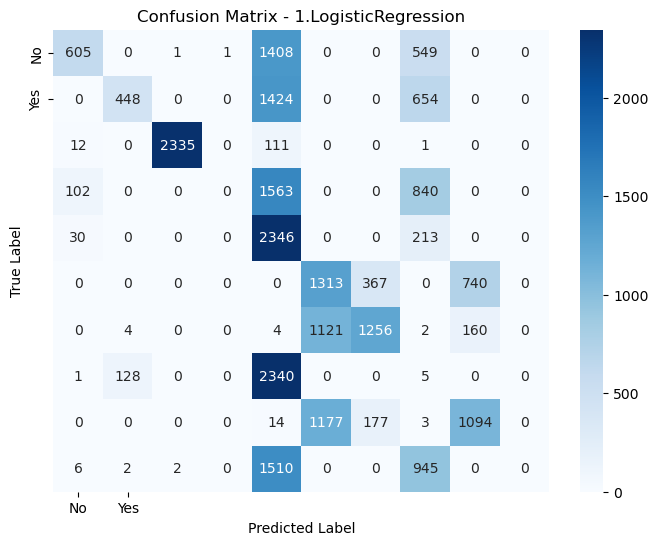

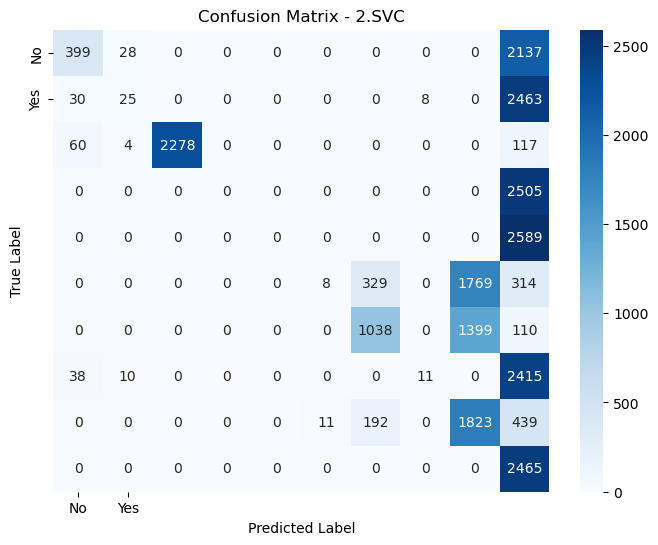

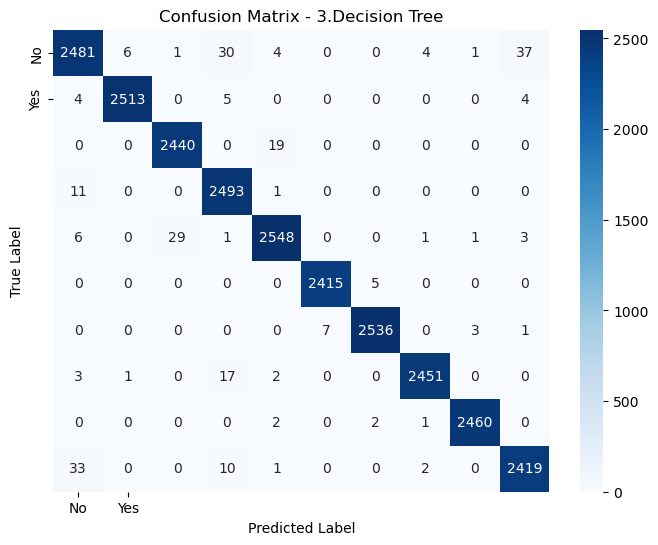

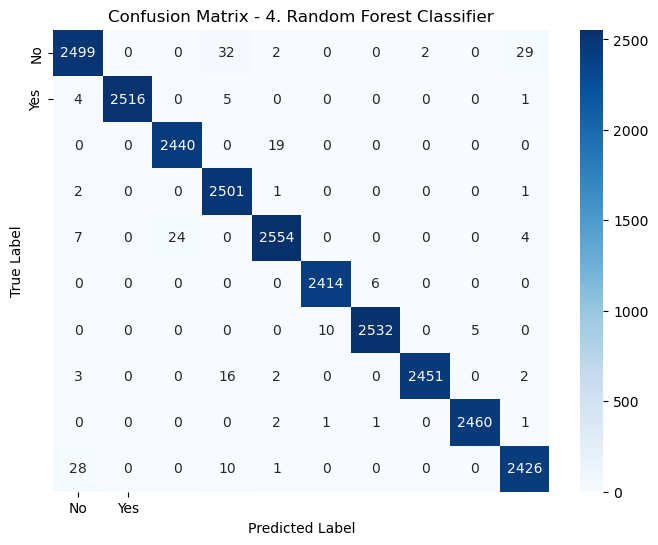

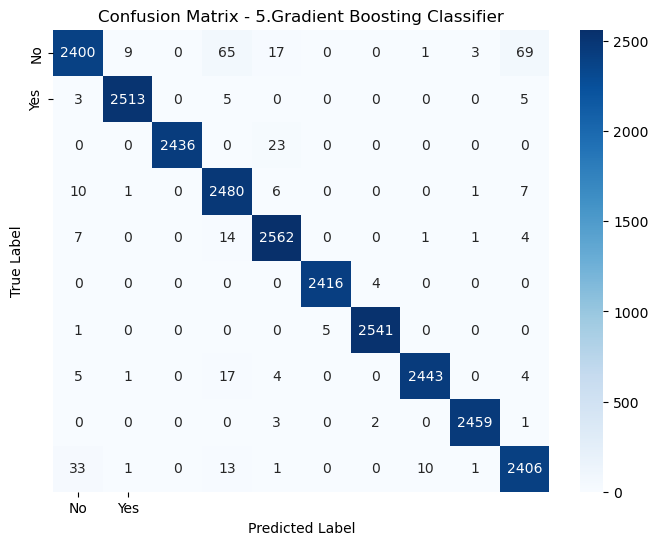

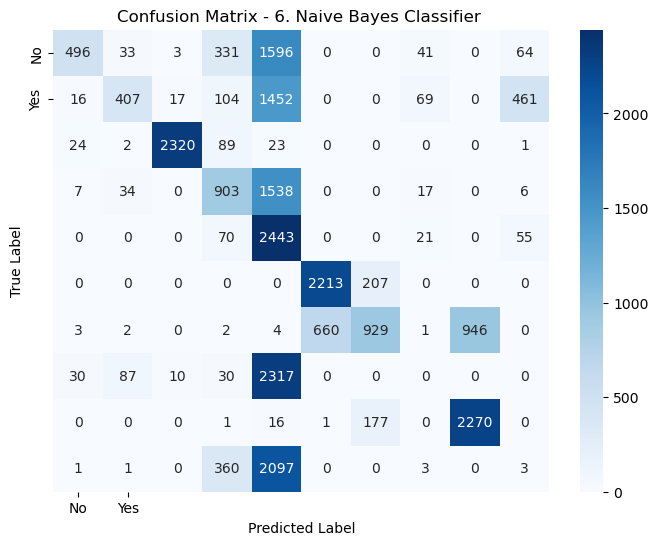

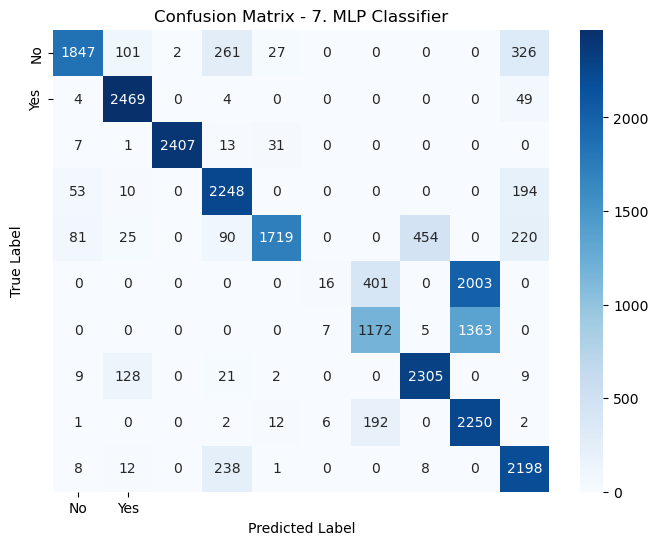

In [86]:

from sklearn.metrics import confusion_matrix                                  

for name,model in Models.items():                                                                                  #looping the models.
    y_pred=model.predict(X_test_selected)                                                                          #making predictions.
    y_pred_prob=model.predict_proba(X_test_selected)[:,1]if hasattr(model,"predict_proba")else y_pred              #checking for probability predictions.

    #Confusion Matrix:
    cm=confusion_matrix(y_test,y_pred)                  #computing the Confusion Matrix.
                                                        #compares actual labels (y_test) with predicted labels (y_pred) and generates a confusion matrix.
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=['No','Yes'],yticklabels=['No','Yes'])
                                                                                        #annot=True: Displays values inside the heatmap cells.
                                                                                        #fmt="d": Ensures values are displayed as integers.
                                                                                        #cmap="Blues": Uses a blue color scheme for better visualization.
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

### Model Comparison:

* Decision Tree, Random Forest, and Gradient Boosting show strong diagonal patterns with high values, indicating good overall classification performance. These models have strong diagonal elements and relatively few off-diagonal elements.

* SVC  shows a peculiar pattern: it appears to be predicting mostly one class (likely the 8th or 9th column) regardless of the true label. This suggests model bias or poor generalization.

* Naive Bayes  shows significant misclassifications with notable off-diagonal patterns. There's substantial confusion, particularly with what appears to be the 4th predicted class.

* MLP Classifier shows mixed performance with certain classes being predicted well (dark blue diagonal cells) but others showing significant confusion, particularly with the 6th predicted class and last predicted class.

* Logistic Regression shows moderate performance with some well-predicted classes but notable confusion in others.

### Best Overall Performance based on confusion matrix: 

* Random Forest shows strong classification ability, with more true positives (diagonal values).Gradient Boosting also performs well but has slightly more misclassifications in some classes.

* Random Forest appears to be slightly better in handling most classes, reducing misclassifications.Gradient Boosting has better performance in some classes but allows slightly more errors in others.

* Based on the diagonal elements (correct classifications), the ensemble methods (Random Forest and Gradient Boosting) appear to perform best overall, with consistent prediction accuracy across most classes.

* Decision Tree also performs well but with slightly different error patterns than the ensemble methods.

* The third class (with ~1570 correctly classified samples) is consistently well-predicted across all models.


#### Random Forest may be more stable across all classes, with fewer misclassifications.


### <span style="color:#6fa8dc;">ROC (Receiver Operating Characteristic) Curve</span>

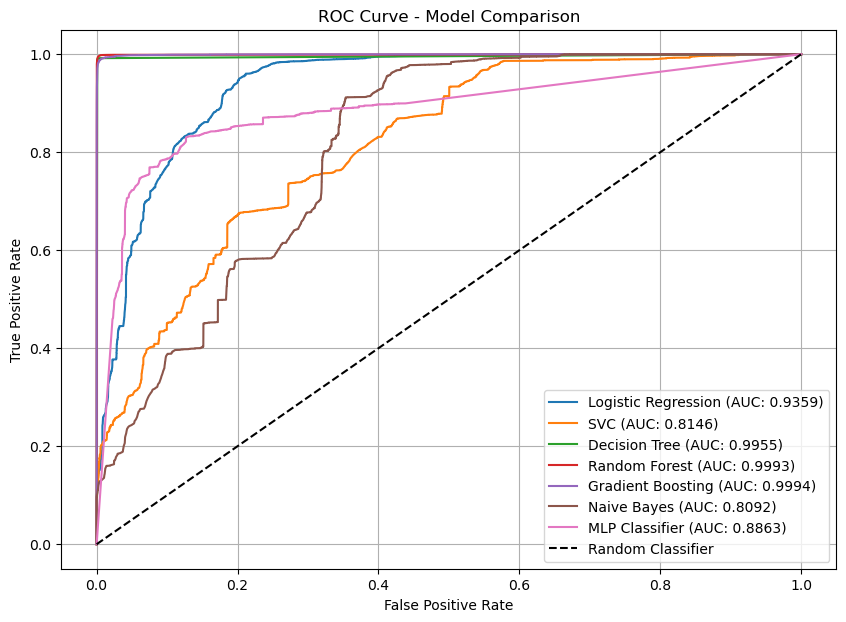

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels
classes = np.unique(y_train)
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Define models
Models = {  
    'Logistic Regression': OneVsRestClassifier(LogisticRegression()),
    'SVC': OneVsRestClassifier(SVC()),  
    'Decision Tree': OneVsRestClassifier(DecisionTreeClassifier()),
    'Random Forest': OneVsRestClassifier(RandomForestClassifier()),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier()),
    'Naive Bayes': OneVsRestClassifier(GaussianNB()),
    'MLP Classifier': OneVsRestClassifier(MLPClassifier())
}

# Set up ROC plot
plt.figure(figsize=(10, 7))

for name, model in Models.items():

    # Use OneVsRestClassifier for multi-class problems
    ovr_model = OneVsRestClassifier(model)
    ovr_model.fit(x_train, y_train_bin)

    # Use predict_proba() if available, otherwise use decision_function()
    if hasattr(ovr_model, "predict_proba"):
        y_pred_prob = ovr_model.predict_proba(x_test)
    else:
        y_pred_prob = ovr_model.decision_function(x_test)

    # Compute micro-average ROC Curve & AUC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    auc_score = auc(fpr, tpr)

    # Plot ROC Curve for each model
    plt.plot(fpr, tpr, label=f"{name} (AUC: {auc_score:.4f})")

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Customize the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model Comparison")
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.show()

### Insights from the ROC Curve Analysis

* Random Forest and Gradient Boosting are tied for the best performance with AUC scores of 0.9993 and 0.9994  nearly perfect

* This confirms what we observed in the confusion matrices, where both models showed very similar and strong classification patterns

* Random Forest and Gradient Boosting curves rise almost vertically from the origin, indicating excellent sensitivity and specificity across thresholds

* Logistic Regression (AUC = 0.9359) and Decision Tree (AUC = 0.9955) also perform well but slightly less than ensemble methods.

* MLP Classifier (AUC = 0.8863) and Naïve Bayes (AUC = 0.8092) are moderate performers.

* SVC (AUC = 0.8146) has the lowest performance among the tested models, indicating it is less effective at distinguishing between classes.


### <span style="color:#6fa8dc;">Hyperparameter Tuning</span>

#### Random Forest Model
* random_state=42: Ensures reproducibility.
* n_estimators=50: Starts with 50 trees, but tuning will adjust it.
* max_depth=10: Limits tree depth to prevent overfitting.
* min_samples_split=5: Ensures a node must have at least 5 samples before splitting.
* min_samples_leaf=2: Prevents leaves with fewer than 2 samples.
* max_features='sqrt': Uses the square root of total features for each split (best for high-dimensional data).
* n_jobs=-1: Uses all CPU cores for faster computation.

In [89]:
rfg = RandomForestClassifier(
    random_state=42,
    n_estimators=50,         
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    n_jobs=-1                
)


In [90]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
grid_search = GridSearchCV(
    estimator=rfg,
    param_grid=param_grid,
    cv=10,  
    scoring='accuracy',  
    n_jobs=-1, 
    verbose=2   
)

In [95]:
grid_search.fit(X_train_selected, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                              min_samples_split=5,
                                              n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=2)

In [96]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [97]:
print("Best Accuracy Score:", grid_search.best_score_)

Best Accuracy Score: 0.9905552800253881


#### Impact of Hyperparameter Tuning on Model Performance

The accuracy improved from 0.9904 (Random Forest Classifier) to 0.9995 after hyperparameter tuning! 

### <span style="color:#6fa8dc;">Best Model Estimator</span>

In [98]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=20, n_estimators=300, n_jobs=-1,
                       random_state=42)

### <span style="color:#6fa8dc;">Saving Best Model</span>

##### <span style="color:#7fbce9;">Define the best model with the given parameters</span>

In [99]:
best_model = RandomForestClassifier(max_depth=20, min_samples_split=5, n_jobs=-1, random_state=42)

##### <span style="color:#7fbce9;">Fit the model with your training data</span>

In [100]:
best_model.fit(X_train_selected,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_jobs=-1,
                       random_state=42)

In [101]:
y_pred = best_model.predict(X_test_selected)

In [102]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2503,    0,    0,   32,    3,    0,    0,    1,    0,   25],
       [   4, 2517,    0,    5,    0,    0,    0,    0,    0,    0],
       [   0,    0, 2439,    0,   20,    0,    0,    0,    0,    0],
       [   2,    0,    0, 2501,    1,    0,    0,    0,    0,    1],
       [   7,    0,   10,    0, 2567,    0,    0,    0,    0,    5],
       [   0,    0,    0,    0,    0, 2413,    7,    0,    0,    0],
       [   0,    0,    0,    0,    0,   15, 2525,    0,    7,    0],
       [   3,    1,    0,   16,    2,    0,    0, 2450,    0,    2],
       [   1,    0,    0,    0,    2,    1,    1,    0, 2459,    1],
       [  30,    0,    0,   10,    1,    0,    0,    0,    0, 2424]])

In [103]:
accuracy = accuracy_score(y_test, y_pred)

In [104]:
print("Accuracy Score : ",accuracy)

Accuracy Score :  0.9913648356920125


##### <span style="color:#7fbce9;">Save the model to a file using joblib</span>

In [106]:
import joblib

In [107]:
joblib.dump(best_model, 'Random_Forest_Classifier.joblib')

['Random_Forest_Classifier.joblib']

In [108]:
print("Best Random_Forest_Classifier model saved successfully.")

Best Random_Forest_Classifier model saved successfully.


In [109]:
best_model = joblib.load("Random_Forest_Classifier.joblib")

### <span style="color:#6fa8dc;">Pipeline Creation</span>

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [111]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('feature_selection', sk),
    ('model', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    ))
])

In [113]:
pipeline.fit(X_train_selected,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x000001AD0C949A80>)),
                ('model',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        min_samples_split=5,
                                        random_state=42))])

In [126]:
joblib.dump(best_model, "iot_ids_pipeline.pkl")

['iot_ids_pipeline.pkl']